<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/MSDS453_A_3_Ontology_Plus_Context_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/djp840/MSDS_453_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS453 - Research Assignment 03 - Ontology Plus Context and Modeling

Take the ontology that you developed in week 6 and consider how your ten chosen documents for this quarter's class corpus map to that ontology.

Protégé is a tool that takes inputs for a human-created Ontology and creates a visualization. 

Use Python algorithms to generate Knowledge Graphs from your documents.

### Importing Packages

In [ ]:
import re
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import seaborn as sns


from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
#from rake_nltk import Rake

import re,string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import ngrams, FreqDist

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pickle
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

import datetime
from packaging import version
from collections import Counter
import time
from timeit import default_timer as timer #import a timer
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

In [ ]:
#!pip install rake_nltk


In [ ]:
# Only run this once, they will be downloaded.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Mount Google Drive to Colab Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<div class="alert alert-block alert-info">
    <b>Spacy </b><br>
    https://spacy.io/usage/models
    </div>

In [ ]:
nlp = spacy.load('en_core_web_sm')

### Data cleanup

In [ ]:
#stop_words = set(stopwords.words('english'))

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['i','a','the','get','co','am','of','to','in','that','film','movie','as','from','and','her',
                'at','2021','24','√°sgeirsson', 'd√©j√†','√©clair','√ºber'
                ,'ive','dont', 'theyre', 'theres', 'theyll', 'doesnt' , 'weve' , 'im', 'sorry','doesn',
                've','ii', 'doppelg√§ngers','flick','movies','films','3bn','2s','√ºbervillain','FALSE','TRUE'
                ,'Äôs', '‚Äô', 'S', '‚Äôre', '‚Äôs', 'Touch√©', 'n‚Äôt', '5', '3‚Äòs', 'It', '\'s']
stopwords.extend(newStopWords)

In [ ]:
#Removing duplicate stop words
def Remove(duplicate):
    final_list = []
    for num in duplicate:
        if num not in final_list:
            final_list.append(num)
    return final_list
     
stop_words_final = Remove(stopwords)
print(stop_words_final)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def remove_stop_words(in_text):
    #stop_words = set(stopwords.words('english')) 
    stop_words = set(stop_words_final)
    word_tokens = word_tokenize(in_text)  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    return filtered_sentence

In [ ]:
def clean_doc(doc): 
    #split document into individual words
    doc = ' '.join(remove_stop_words(doc))

    tokens=doc.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 4]
    #lowercase all words
    tokens = [word.lower() for word in tokens]
    # filter out stop words
    #stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words_final]  
       
    # word stemming    
    # ps=PorterStemmer()
    # tokens=[ps.stem(word) for word in tokens]
    return tokens

### Load Data and Create Blog of Text for Knowledge Graph Generation

In [ ]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-453/W7"

total 11192
-rw------- 1 root root 3348097 Feb 21 01:16  MSDS453_Assignment_03_v07_20211226.ipynb
-rw------- 1 root root  558356 Feb 21 00:51 'MSDS453_Assignment3_Additional_Code_Sentiment_Classification(team).ipynb'
-rw------- 1 root root 5677928 Feb 19 22:36  MSDS_453_Assignment_3_Experiments_Ref.ipynb
-rw------- 1 root root  633453 Feb 21 00:51 'MSDS453_Assignment3_Genre_Classification_Additional_Code(team).ipynb'
-rw------- 1 root root 1218791 Feb  6 03:15  MSDS453_Sec57_ClassCorpus_v4.csv
-rw------- 1 root root   10728 Feb 20 03:32  sub_obj.csv
-rw------- 1 root root     143 Feb 20 03:25  sub_obj.gsheet
-rw------- 1 root root   10774 Feb 20 03:34 'sub_obj - sub_obj.csv'


In [ ]:
path_to_file=('/content/drive/My Drive/Colab_Notebooks/MSDS-453/W7/MSDS453_Sec57_ClassCorpus_v4.csv')
data = pd.read_csv(path_to_file)
data.head(2)

#adding two columns to the dataframe to store the processed text and tokenized text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))

data.head(2)

,Doc_ID,DSI_Title,Text,Submission File Name,Student Name,Genre of Movie,Review Type (pos or neg),Movie Title
0,0,HAG_Doc1_Frozen2,"Parents, you can breathe a sigh of relief. Fro...",HAG_Doc1_Frozen2,HAG,Comedy,Positive,Frozen_2
1,1,HAG_Doc2_Frozen2,Theyre back the first Disney princesses to pe...,HAG_Doc2_Frozen2,HAG,Comedy,Positive,Frozen_2


,Doc_ID,DSI_Title,Text,Submission File Name,Student Name,Genre of Movie,Review Type (pos or neg),Movie Title,processed_text
0,0,HAG_Doc1_Frozen2,"Parents, you can breathe a sigh of relief. Fro...",HAG_Doc1_Frozen2,HAG,Comedy,Positive,Frozen_2,"[parents, breathe, relief, frozen, showstopper..."
1,1,HAG_Doc2_Frozen2,Theyre back the first Disney princesses to pe...,HAG_Doc2_Frozen2,HAG,Comedy,Positive,Frozen_2,"[first, disney, princesses, persuade, boxoffic..."


In [ ]:
corpusJoined_orig = ' '.join([x for x in data['Text']]).split('.')
corpusJoined_orig[:5]

['Parents, you can breathe a sigh of relief',
 ' Frozen 2s new showstopper Into the Unknown isnt as aggressive an earworm as Let it Go',
 ' Its more lyrically complex, with a lot more high notes  the kind thatll break your eardrums if sung by anyone who isnt Idina Menzel  and its hard to imagine a car full of kids howling such a delicate scale for hours upon hours',
 '\nFrozen 2, Disneys sequel to its $1',
 '3bn hit, is more mature, ambitious, and intricate than its predecessor']

In [ ]:
data.head()
data.shape
data['Movie Title'].unique()

,Doc_ID,DSI_Title,Text,Submission File Name,Student Name,Genre of Movie,Review Type (pos or neg),Movie Title,processed_text
0,0,HAG_Doc1_Frozen2,"Parents, you can breathe a sigh of relief. Fro...",HAG_Doc1_Frozen2,HAG,Comedy,Positive,Frozen_2,"[parents, breathe, relief, frozen, showstopper..."
1,1,HAG_Doc2_Frozen2,Theyre back the first Disney princesses to pe...,HAG_Doc2_Frozen2,HAG,Comedy,Positive,Frozen_2,"[first, disney, princesses, persuade, boxoffic..."
2,2,HAG_Doc3_Frozen2,Released in 2013 to a record-scorching $1.29 b...,HAG_Doc3_Frozen2,HAG,Comedy,Positive,Frozen_2,"[released, recordscorching, billion, frozen, d..."
3,3,HAG_Doc4_Frozen2,"After the colossal success of Frozen, Disneys ...",HAG_Doc4_Frozen2,HAG,Comedy,Positive,Frozen_2,"[colossal, success, frozen, disneys, princess,..."
4,4,HAG_Doc5_Frozen2,Animated adventure featuring the voices of Idi...,HAG_Doc5_Frozen2,HAG,Comedy,Positive,Frozen_2,"[animated, adventure, featuring, voices, idina..."


(249, 9)

array(['Frozen_2', 'Spider_Man_3', 'Cruella', 'The_Matrix_Resurrecton',
       'Groundhog_Day', 'Red_Notice', 'KingOfStatenIsland', 'Encanto',
       'Sudden_Impact', 'Speed_Racer',
       'Pirates_of_the_Caribbean_Curse_of_the_Black_Pearl',
       'Casino_Royale', 'Mission_Impossible_Fallout', 'Hereditary',
       'The_Conjuring_The_Devil_Made_Me_Do_It', 'Us_2019', 'The Ring',
       'Lamb', 'Poltergeist', 'Interstellar', 'The Martian', 'Arrival',
       'Guardians_of_the_Galaxy', 'Pacific_Rim'], dtype=object)

In [ ]:
my_movie = data [data['Movie Title'] == 'The_Conjuring_The_Devil_Made_Me_Do_It']
my_movie.shape
corpusJoined_mymovie = ' '.join([x for x in my_movie['Text']]).split('.')

(10, 9)

### Function Entity Extraction

In [ ]:
en_nlp = spacy.load('en')
import spacy
from nltk import Tree
def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""
  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence
  prefix = ""
  modifier = ""
  # https://stackoverflow.com/questions/36610179/how-to-get-the-dependency-tree-with-spacy
  doc = en_nlp(sent)
  # def to_nltk_tree(node):
  #     if node.n_lefts + node.n_rights > 0:
  #         return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
  #     else:
  #         return node.orth_
  def to_nltk_tree(node):
      if node.n_lefts + node.n_rights > 0:
          return Tree(node.dep_+ ":"+ node.orth_, [to_nltk_tree(child) for child in node.children])
      else:
          return node.dep_+ ":" + node.orth_
  print (sent)
  #[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]
  for sent_i in doc.sents:
      if ( type(to_nltk_tree(sent_i.root)) is str ):
          # no tree to print
          print ("Str only: ", sent_i)
      else:
          to_nltk_tree(sent_i.root).pretty_print()
  #############################################################
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      
      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################
  return [ent1.strip(), ent2.strip()]

### Entity Pair Extraction from Corpus

In [ ]:
entity_pairs = []

for i in tqdm(corpusJoined_mymovie):
  entity_pairs.append(get_entities(i))

  0%|          | 1/363 [00:00<00:39,  9.11it/s]

As we continue to plunder the mixed-up files of Ed and Lorraine Warren, the infamous paranormal investigators behind the eventual genre staple The Amityville Horror, it’s clear we’ve now bypassed a state of diminishing returns
                                                                                                                                               ROOT:’s                                                                                                                                                                                       
    ______________________________________________________________________________________________________________________________________________|________________________________________________________________________________________________________________________________________________                                           
   |       |          |                       advcl:continue                                            

  1%|▏         | 5/363 [00:00<00:29, 12.27it/s]


Director Michael Chaves, who cut his teeth on the familiar (and equally vacuous) The Curse of La Llorona (2019), usurps the reigns from series creator James Wan, the godfather of yet another vibrant franchise (Saw, Insidious) now entering the realm of its death knell
                                                  ROOT:Chaves                                                         
        _______________________________________________|_____________________                                          
       |            |       |           |                                relcl:cut                                    
       |            |       |           |               _____________________|___________                              
       |            |       |           |              |          |                   prep:on                         
       |            |       |           |              |          |                      |                             
       |      

  2%|▏         | 7/363 [00:00<00:36,  9.83it/s]

 With Ed unconscious in the hospital after a heart attack, all parties are distracted by the demon’s whereabouts, leaving the child’s body to inhabit Arne Johnson (Ruairi O’Connor), boyfriend of his older sister Debbie (Sarah Catherine Hook)
                                                                                                                           ROOT:distracted                                                                                                                                                   
    ______________________________________________________________________________________________________________________________|____________________________________________________________________________________________________________________________________                       
   |         |         |       |                       |                                                 |                        |                                            advcl:leav

  3%|▎         | 11/363 [00:01<00:36,  9.74it/s]

 Since then, regular visitations have cast a brighter light upon these increasingly hoary antics (with a bushel of tangential offspring in tows, such as The Nun and the Annabelle series)
                                                                                                             ROOT:cast                                                                                                                                  
    _____________________________________________________________________________________________________________|____________                                                                                                                           
   |       |        |            |                        |                   |                                           prep:upon                                                                                                                     
   |       |        |            |                        |      

  4%|▎         | 13/363 [00:01<00:33, 10.54it/s]

 Rather than a possession, we’re dealing with a curse, chasing quid pro quo arrangements to find clues that hurtle us haphazardly towards a cornball finale
                                                                                    ROOT:dealing                                                                                                                   
    _____________________________________________________________________________________|__________________________________________________                                                                        
   |       |        |       |                      |                         |                                                        advcl:chasing                                                                
   |       |        |       |                      |                         |                           ___________________________________|___________                                                       

  4%|▍         | 15/363 [00:01<00:43,  7.97it/s]

 Lorraine’s gifts leave her on a dangerous precipice, and the shallow anxiety meant to be generated by Ed’s constant clucking only allows the script to reveal itself as a poorly constructed glob of lip-synching
                                                                                                                                       ROOT:leave                                                                                                                                                                 
      _____________________________________________________________________________________________________________________________________|______________________________________________________________________________________________                                                                         
     |         |        |      |              |                             |                                                              |                                  

  4%|▍         | 16/363 [00:01<00:55,  6.24it/s]


The end credits feature actual photos of the Warrens, revealing the weird possibilities of more intriguing casting (someone out there could do something genuinely bizarro with Grace Zabriskie as Lorraine), and an even less assured supporting cast in this third installment negates the possibility of pleasurable side distractions
                                                                                                                                                           ROOT:feature                                                                                                                                                                                                                
    ____________________________________________________________________________________________________________________________________________________________|____________________________                                                                                                        

  5%|▍         | 17/363 [00:02<00:58,  5.92it/s]

 Early 80s tunes proliferate the soundtrack but can’t conjure (pun intended) the correct period
                                    ROOT:proliferate                                              
   ________________________________________|______________________                                 
  |    nsubj:tunes         |                                      |                               
  |         |              |                                      |                                
  |    compound:80s        |                                 conj:conjure                         
  |         |              |                ______________________|______________                  
  |     amod:Early  dobj:soundtrack        |            |                 parataxis:intend        
  |         |              |               |            |                        ed               
  |         |              |               |            |          ______________|____________     
cc:but   

  5%|▌         | 19/363 [00:02<00:52,  6.51it/s]

 However, the film’s most persuasively constructed scene, set to Blondie’s Call Me, while not coming so far as to court the iconicity of American Gigolo’s opening credits, channels an eeriness the rest of the film lacks
                                ROOT:set                                                             
    _______________________________|__________________________________________________________        
   |       |           |                 nsubj:film                                           |      
   |       |           |            _________|___________________                             |       
   |       |           |           |         |              appos:scene                       |      
   |       |           |           |         |          _________|_____________               |       
   |       |           |           |         |         |                amod:constructed      |      
   |       |           |           |         |         |       

  6%|▌         | 22/363 [00:02<00:39,  8.65it/s]

 Based on “the demonic case that shocked America,” The Conjuring: The Devil Made Me Do It centers on the first known court case in U
    ROOT:Based                                                                                                             
  ______|___________________                                                                                                
 |                       prep:on                                                                                           
 |       ___________________|___________________                                                                            
 |      |                                   pobj:case                                                                      
 |      |          _____________________________|__________________________________________________________                 
 |      |         |         |          |        |                relcl:shocked                      appos:Conjuring     

  7%|▋         | 27/363 [00:02<00:28, 11.86it/s]


Amid David’s demonic screams and horrifying body contortions, Ed begins to suffer a heart attack and witnesses David’s sister’s boyfriend, Arne Johnson (Ruairi O’Connor), selflessly demanding the young boy’s demon possess him instead
                                               ROOT:begins                                                                          
    ________________________________________________|___________________________________                                             
   |       |          prep:Amid                                                         |                                           
   |       |       _______|____________                                                 |                                            
   |       |      |               pobj:screams                                          |                                           
   |       |      |        ____________|__________________________                      |         

  9%|▊         | 31/363 [00:03<00:27, 12.03it/s]

 But as the Warrens dig deeper into Arne’s case, they soon uncover signs that point to a satanic curse that could have dire consequences for all involved
                                                                           ROOT:uncover                                                                                                                      
    ____________________________________________________________________________|__________________________________________                                                                                   
   |        |           |        |                                |                                                    dobj:signs                                                                            
   |        |           |        |                                |                                                        |                                                                                  
   |        |       

  9%|▉         | 33/363 [00:03<00:28, 11.71it/s]

 After reading the Wikipedia entry, it’s clear writer David Leslie Johnson-McGoldrick has taken significant liberties with the truth of this real-life event
                                                                                                      ROOT:taken                                                                                                                         
    ______________________________________________________________________________________________________|_______________________________________________________________________________________                                        
   |            |                                                  |                                                      |                                        |                          prep:with                                  
   |            |                                                  |                                                      |                 

 10%|▉         | 35/363 [00:03<00:29, 11.04it/s]


Unsurprisingly, the Warrens never battled a satanic curse in the aftermath of Johnson’s misdemeanor, nor did the presiding judge even allow any suggestion of demonic possession to be entered as a defense into his courtroom for the jury to hear
                                                                                                                                              ROOT:battled                                                                                                                                                             
    _______________________________________________________________________________________________________________________________________________|________________________________________________________________                                                                                                    
   |        |        |      |           |               |                 |                              prep:in                  

 11%|█         | 39/363 [00:03<00:25, 12.62it/s]

 There’s no speculation here
         ROOT:speculation                       
    ____________|_________________________       
   |            |              |      intj:There
   |            |              |          |      
punct:’s      det:no      advmod:here     :     

 In the eyes of this mostly fictitious film, Arne Johnson was possessed by a demonic spirit, which inherently makes him innocent of murder
                                                                             ROOT:possessed                                                                                              
    _______________________________________________________________________________|_________________________________________                                                             
   |         |                  prep:In                                            |                                      agent:by                                                       
   |         |        ___

 11%|█▏        | 41/363 [00:04<00:26, 12.22it/s]

 Seek out 2005’s The Exorcism of Emily Rose for a better example of a courtroom drama centered on an apparent possession that offers both sides of the story for the viewer to determine their own opinion
    ROOT:Seek                   
  ______|__________________      
 :   prt:out  dobj:2005 punct:’s

                                                                       ROOT:Exorcism                                                                                                                        
    _________________________________________________________________________|____________                                                                                                                   
   |          |                                                                        prep:for                                                                                                             
   |          |                                                                 

 12%|█▏        | 43/363 [00:04<00:28, 11.34it/s]

S
Str only:  S
 courtroom
ROOT:courtroom
      |        
      :       

 Part buddy-cop detective film, part paranormal spookiest, The Conjuring: The Devil Made Me Do It deviates from the foundation director James Wan established in the previous two movies and travels down its outlandish path of satanic worship, witches, curses, and zombies (okay, they’ve technically possessed corpses, but close enough)
                                                              ROOT:film                                                                               
    ______________________________________________________________|___________________________________________________________________                 
   |       |          |                      compound:detecti                                |                                        |               
   |       |          |                             ve                                       |                                        |   

 13%|█▎        | 47/363 [00:04<00:27, 11.44it/s]


While Wan remains one of the film’s producers and receives a story credit, his absence in the director’s chair is painfully noticeable
                                                                     ROOT:is                                                                                                      
                                                  ______________________|________________________________________________________________________________________________          
                                           advcl:remains                                                                        |                          |             |        
     ____________________________________________|________________________________________                                      |                          |             |         
    |        |            |           |          |           |       attr:one             |                               nsubj:absence           

 13%|█▎        | 49/363 [00:04<00:27, 11.43it/s]

                                                                                                 ROOT:prefers                                                                                                                            
      ________________________________________________________________________________________________|______________                                                                                                                     
     |                                                                                                           dobj:style                                                                                                              
     |          _____________________________________________________________________________________________________|________________________________________________________________________                                            
     |         |      |          |             |              

 14%|█▍        | 51/363 [00:05<00:31,  9.96it/s]

                                                                                                                           ROOT:say                                                                                                                                                            
    __________________________________________________________________________________________________________________________|__________________________                                                                                                                                       
   |       |        |         |                                                                                                                       prep:for                                                                                                                                 
   |       |        |         |                                                                                                        

 15%|█▍        | 54/363 [00:05<00:32,  9.54it/s]



It’s ultimately left to Wilson and Farmiga to save The Conjuring: The Devil Made Me Do It
                                                                       ROOT:Made                                                                         
    _______________________________________________________________________|________________________________________________________________              
   |                                           ccomp:left                                                                |                  |            
   |            ___________________________________|__________________________________________                           |                  |             
   |           |                |                           prep:to                       advcl:save                     |                  |            
   |           |                |                              |                      ________|____________              |              

 15%|█▌        | 56/363 [00:05<00:34,  8.85it/s]

 Farmiga effortlessly captures Lorraine’s tortured soul with ease
                               ROOT:captures                                   
        _____________________________|_____________                             
       |               |                     dobj:Lorraine                     
       |               |              _____________|___________                 
       |               |             |                     appos:soul          
       |               |             |              ___________|__________      
       |         nsubj:Farmiga       |             |                  prep:with
       |               |             |             |                      |     
advmod:effortles       :          punct:’s   amod:tortured            pobj:ease
      sly                                                                      



 16%|█▌        | 58/363 [00:05<00:30, 10.12it/s]

 At the same time, Wilson is typically charming as the ultimate wingman to his wife’s dangerous ventures where the duo faces the demons torturing the innocent
                         ROOT:is                                                                                                                                                           
    ________________________|_______________________________________________________                                                                                                        
   |         |              |                |                                acomp:charming                                                                                               
   |         |              |                |                                      |                                                                                                       
   |         |              |                |                                   prep:a

 17%|█▋        | 62/363 [00:06<00:35,  8.42it/s]


By deviating far from the evocative style of the first two films, The Conjuring: The Devil Made Me Do It attempts something new but doesn’t have the skills to stick the landing
                                          ROOT:Made                                                                       
    __________________________________________|______________________________________________________________________      
   |       |         prep:By                                                                  |            |         |    
   |       |      ______|_____________________                                                |            |         |     
   |       |     |                     pcomp:deviating                                        |            |         |    
   |       |     |       _____________________|____________                                   |            |         |     
   |       |     |      |                              prep:from                 

 18%|█▊        | 64/363 [00:06<00:35,  8.51it/s]

 However, if this is the final cinematic outing for Ed and Lorraine Warren, they’re going out with a mild whimper than a thunderous roar
                                                                             ROOT:going                                                                                                              
    _____________________________________________________________________________|____________________________________________________________________________                                        
   |       |        |         |       |          |                                       advcl:is                                                             |                                      
   |       |        |         |       |          |            ______________________________|____________                                                     |                                       
   |       |        |         |       |          |           |       

 19%|█▊        | 68/363 [00:06<00:24, 11.86it/s]

 The glossy sequel, directed by Michael Chaves, never generates any tension or scares; its mystery is half-assed, its emotions manufactured by an algorithm
                                                                               ROOT:is                                                                                                                            
    ______________________________________________________________________________|_______________________________________________________________________________________________________                         
   |       |                                               ccomp:generates                                                         |                        |                             |                       
   |       |         _____________________________________________|______________________________________                          |                        |                             |                       

 19%|█▉        | 70/363 [00:07<00:27, 10.55it/s]


The movie starts with a laughably heightened sequence of the Warrens, Ed (Patrick Wilson), and Lorraine (Vera Farmiga), assisting in the exorcism of little, bespectacled David Glatzel (Julian Hilliard)
                                                                                                               ROOT:starts                                                                                                                                                           
    ________________________________________________________________________________________________________________|___________________________________________________________________________________________________                                                              
   |      |         |                                       prep:with                                                                    |                                                                              |                       

 20%|██        | 74/363 [00:07<00:21, 13.28it/s]

” “Come over for dinner,” the Warrens cheekily tell her, in the film’s most inspired moment, “we’ll introduce you to Annabelle
                                                                                  ROOT:introduce                                                                                                       
    ____________________________________________________________________________________|______________________________________________________________________________________________________         
   |       |       |       |        |       |                                                            ccomp:tell                                                                            |       
   |       |       |       |        |       |         _______________________________________________________|___________________________________________________________________              |        
   |       |       |       |        |       |        |       |         

 22%|██▏       | 79/363 [00:07<00:19, 14.21it/s]

 An eccentric local priest spouts nonsense; blood gushes out of the shower, bodies twist and contort at impossible angles, and creatures from he’ll crawl towards the camera
                                                                                          ROOT:gushes                                                                                     
    ___________________________________________________________________________________________|______________________________________________                                             
   |         |         |                                 ccomp:spouts                       prep:out                                      conj:twist                                      
   |         |         |           ___________________________|____________                    |              ________________________________|___________________________________         
   |         |         |          |                                   nsubj:p

 23%|██▎       | 84/363 [00:07<00:16, 17.10it/s]

 Only the most naïve viewer will be shocked by what happens next
                              ROOT:shocked                                                      
    _______________________________|_________________________________________                    
   |         |              nsubjpass:viewer                              agent:by              
   |         |          ___________|_______________                          |                   
   |         |         |      advmod:Only    compound:naïve            pcomp:happens            
   |         |         |           |               |             ____________|____________       
aux:will auxpass:be det:the        :           amod:most    nsubj:what               advmod:next

 This is the level of predictability we’re working with here
                       ROOT:is                                         
     _____________________|_____________                                
    |                               attr:level

 24%|██▍       | 88/363 [00:08<00:15, 17.46it/s]

 “You know, I met Elvis once,” Lorraine states
                                         ROOT:states                                              
    __________________________________________|__________                                          
   |       |           |                             ccomp:met                                    
   |       |           |             ____________________|________________________________         
   |       |           |            |         |          |           |      punct:“ parataxis:know
   |       |           |            |         |          |           |         |          |        
punct:, punct:” compound:Lorrain punct:,   nsubj:I   dobj:Elvis advmod:once    :      nsubj:You   
                       e                                                                          

 “Was that before or after he died?” a character asks her
      ROOT:“                                                                
  ______|_____________

 25%|██▌       | 91/363 [00:08<00:15, 17.01it/s]

 Ed proclaims: “You promised a demon a soul in another eloquent instance
                         ROOT:proclaims                                                                  
    ___________________________|_________________________                                                 
   |       |       |                               ccomp:promised                                        
   |       |       |            _________________________|_____________                                   
   |       |       |           |            |                      dobj:soul                             
   |       |       |           |            |             _____________|____________                      
   |       |       |           |            |            |                       prep:in                 
   |       |       |           |            |            |                          |                     
   |       |    nsubj:Ed       |        dobj:demon       |                 

 26%|██▌       | 93/363 [00:08<00:15, 17.22it/s]

 Like most other chapters in this series, The Conjuring: The Devil Made Me Do It tries too hard by doing too much
    ROOT:Like                                                                     
  ______|______________________                                                    
 |                       pobj:chapters                                            
 |       ______________________|__________________________________                 
 |      |         |            |         prep:in                  |               
 |      |         |            |            |                     |                
 |      |         |            |       pobj:series         appos:Conjuring        
 |      |         |            |            |          ___________|___________     
 :  amod:most amod:other    punct:,      det:this  det:The                 punct::

            ROOT:Made         
      __________|________      
nsubj:Devil           ccomp:Do
     |                   |     
  det:Th

 27%|██▋       | 97/363 [00:08<00:17, 15.02it/s]

 The over-reliance on familiar tropes – it hinges overall “Lorraine wandering through the otherworld” scenes – bogs it down further into the pits of cinematic hell
                                                                                   ROOT:bogs                                                                                                                               
    ___________________________________________________________________________________|_____________________________________________________________________________________________________                               
   |       |                     |                                                              parataxis:hinges                                                                         prep:into                         
   |       |                     |                                  ___________________________________|_________________________________                                      

 28%|██▊       | 101/363 [00:08<00:16, 15.90it/s]

 The fact that it’s based on a real story, the 1981 “Devil made Me Do it” trial, will only make you wish you were watching a doc on the subject instead
                  ROOT:fact                                                                                             
    __________________|______________________________________                                                            
   |                                                      acl:made                                                      
   |         ________________________________________________|_____________________________________________              
   |        |         |              nsubj:it                                   |                          |            
   |        |         |         ________|_________                              |                          |             
   |        |         |        |              acl:based                         |                          |           

 29%|██▊       | 104/363 [00:09<00:16, 15.72it/s]



 I remember seeing James Wan’s The Conjuring for the first time in 2017 and being utterly petrified during the entire runtime to the point where I couldn’t sleep at night
                                       ROOT:remember                                                                                                                                                   
    _________________________________________|__________________________________________________________                                                                                                
   |                                                                                               xcomp:seeing                                                                                        
   |       _____________________________________________________________________________________________|_______________________                                                                        
   |      |              

 30%|██▉       | 108/363 [00:09<00:19, 12.86it/s]

 His two Conjuring films are the only good pictures in this ever-expansive “cinematic universe” filled with pedantic spinoff films such as the Annabelle trilogy (with a somewhat decent middle chapter by David F
                                                                                                       ROOT:are                                                                                                                                                                             
                  ________________________________________________________________________________________|________________________________________                                                                                                                                          
                 |                                                                                                                           attr:pictures                                                                

 30%|███       | 110/363 [00:09<00:21, 11.94it/s]


                                                                                                ROOT:announced                                                                                                            
      ________________________________________________________________________________________________|_____________                                                                                                       
     |            |           |                                                                                 ccomp:helm                                                                                                
     |            |           |           __________________________________________________________________________|_____________________________________________________________________________________                 
     |            |           |          |         |        |                          |                                 

 31%|███       | 112/363 [00:09<00:22, 11.04it/s]

        ROOT:continues                                                                                                                                            
    __________|_________________________________                                                                                                                   
   |          |             |               advcl:Made                                                                                                            
   |          |             |          _________|_____________________                                                                                             
   |          |             |         |         |               ccomp:manages                                                                                     
   |          |             |         |         |          ___________|__________________                                                                          
   |          |    

 32%|███▏      | 116/363 [00:10<00:19, 12.88it/s]

 After the possessed child, David Glatzel (Julian Hilliard), performs gruesome contortions with his body and almost kills Ed, Arne Johnson (Ruairi O’Connor) asks the demon to take him instead of David does
                                                         ROOT:performs                                                                                              
    ___________________________________________________________|_____________________________________________________________________________________________        
   |      |        |                                      nsubj:child                                                       dobj:contortions                 |      
   |      |        |          _________________________________|______________                                       ______________|_____________            |       
   |      |        |         |          |           |                   appos:Glatzel                               |               

 33%|███▎      | 120/363 [00:10<00:17, 14.10it/s]


After its opening scene, The Devil Made Me Do It rapidly turns into predictable fluff, with jump scares featuring loud musical cues and fakeouts you see coming a mile away
                                                                                           ROOT:Made                                                                                                                                
    ___________________________________________________________________________________________|____________________________                                                                                                         
   |            |                                   |                                                                  ccomp:turns                                                                                                  
   |            |                                   |          _____________________________________________________________|______________

 34%|███▍      | 124/363 [00:10<00:17, 13.98it/s]

 The projector scene is a classic example of that—you can see the scare coming a mile away, but you don’t expect to see Pennywise leaping out of the screen and running to attack the children
                                                                                                             ROOT:is                                                                                                                                           
                       _________________________________________________________________________________________|_______________________________________                                                                                                        
                      |                         |                                                                                                 parataxis:see                                                                                                
                      |                 

 35%|███▍      | 126/363 [00:10<00:16, 14.59it/s]

                           ROOT:Made                                                                                                            
      _________________________|_____________________________________________                                                                    
     |                                                                  ccomp:wants                                                             
     |          _____________________________________________________________|_____________________________                                      
     |         |      |        |            xcomp:impress                                              advcl:have                               
     |         |      |        |        __________|_____________              _____________________________|___________________                  
nsubj:Devil    |      |        |       |                    prep:with        |          |        |         |               dobj

 36%|███▌      | 130/363 [00:11<00:17, 13.53it/s]

 The film is so busy setting up the next jump scare that it completely forgets about crafting a great story to invest the audience in
                                                                            ROOT:is                                                                                              
     __________________________________________________________________________|_________                                                                                         
    |                                                                                acomp:busy                                                                                  
    |           _________________________________________________________________________|_____________________________                                                           
    |          |                          |                                                                      ccomp:forgets                          

 36%|███▋      | 132/363 [00:11<00:16, 14.16it/s]


                                                                ROOT:is                                                                              
    _______________________________________________________________|______________________________                                                    
   |      |           |                      |                                                 conj:’re                                              
   |      |           |                      |                      ______________________________|____________                                       
   |      |           |                      |                     |           |                          attr:actors                                
   |      |           |                      |                     |           |          _____________________|____________________                  
   |      |    nsubj:chemistry           acomp:good                |           |         |      

 37%|███▋      | 136/363 [00:11<00:17, 12.77it/s]


It is a shame because the previous Conjuring films (not the spinoffs) cared about the story they were telling — always setting up the account before the scares and building it in a way that it became incredibly effective once the pin drops would happen because the audience would be invested in the story
                                 ROOT:is                                                                                                                                                                                                                                                                                                                                                                              
    ________________________________|____________________________________________________________                                                                                                                                                                                              

 38%|███▊      | 138/363 [00:11<00:17, 12.62it/s]

 Yet, nothing is terrifying about speakers cranking up to 11, in a Merzbow-like sound design, in which the film’s quieter sequences have barely perceptible dialogues, almost as if the characters are whispering to one another
                                                                                                                                      ROOT:terrifying                                                                                                                                            
    _________________________________________________________________________________________________________________________________________|_____________________________________________________________________________________________________                                               
   |          |         |       |        |                prep:about                                                                      prep:in                                                 

 39%|███▊      | 140/363 [00:12<00:18, 12.09it/s]


The Conjuring: The Devil Made Me Do It is only loud for the sake of being loud because it’s cooler to experience loud noises on the big screen and have a collective experience of the most formulaic haunted house sounds you could ever imagine
ROOT:Conjuring
      |        
   det:The    
      |        
      :       
              

                                                                                                               ROOT:Made                                                                                                                                                             
    _______________________________________________________________________________________________________________|________                                                                                                                                                          
   |         |                                                                                             

 40%|███▉      | 144/363 [00:12<00:18, 12.12it/s]

                                                                                                                                           ROOT:enough                                                                                                                            
    ____________________________________________________________________________________________________________________________________________|___________________________________________________                                                                               
   |         |                  |                             xcomp:save                                                                                                                       advcl:filled                                                                       
   |         |                  |                 ________________|________________________                                                                                   

 40%|████      | 146/363 [00:12<00:18, 11.68it/s]



 In 1981, paranormal investigators/real-life-con-artists-but-nevermind Ed and Lorraine Warren (Patrick Wilson and Vera Farmiga) were on the front lines of yet another demonic possession — this time of eight-year-old David Glatzel (Julian Hilliard), who pretzels his body and speaks in tongues while under the influence of a demonic force
                                                                                                                                                                                                                                      ROOT:were                                                                                                                                                                                                                                                                             
    ___________________________________________________________________________________________________________________________________________________

 41%|████      | 148/363 [00:12<00:19, 11.11it/s]

 This time, they’re not just looking to oust an evil force but prove in a court of law that Arne’s crimes were the result of demonic possession
                                                                           ROOT:looking                                                                                                                                     
    ____________________________________________________________________________|_________________________________________________                                                                                           
   |        |         |       |         |            |                                                                        xcomp:oust                                                                                    
   |        |         |       |         |            |          __________________________________________________________________|______________________                                       

 41%|████▏     | 150/363 [00:12<00:18, 11.78it/s]

 Derived from another “based on a true story (with heavy asterisks)” case, this third entry drops us into Johnson’s real-life case, the first time demon possession was cited as a legal defense in a murder trial
                       ROOT:Derived                                  
  __________________________|___________                              
 |       |                           punct:“                         
 |       |                              |                             
 |       |                          intj:based                       
 |       |                              |                             
 |       |                           prep:on                         
 |       |                              |                             
 |       |                          pobj:story                       
 |       |          ____________________|____________________         
 |       |         |        |           |         |      prep:with   
 |       |    

 42%|████▏     | 152/363 [00:13<00:22,  9.40it/s]

 Granted, the usual James Wan-inspired tricks are here: the nostalgia-soaked ’70s aesthetic, the breath-catching long takes that lead to jump scares, the deliberate nods to horror films of the past
                                      ROOT:are                                                           
      ___________________________________|_____________________                                           
     |         |              |                           nsubj:tricks                                   
     |         |              |                     ___________|__________________________                
     |         |        advcl:Granted              |       amod:usual               amod:inspired        
     |         |      ________|__________          |           |             _____________|__________     
advmod:here punct::  :                punct:,  nmod:James   det:the    npadvmod:Wan               punct:-

                                                        

 42%|████▏     | 154/363 [00:13<00:26,  8.02it/s]


                                                                                ROOT:are                                                                                                                                                
    _______________________________________________________________________________|_________________________________________________________________________________________________________                                            
   |         |          |       |      |                          ccomp:left                                               |             |                                               conj:feel                                      
   |         |          |       |      |        ______________________|_____________________________________               |             |                         __________________________|_________________________                  
   |         |          |       |      |       |          |      

 43%|████▎     | 157/363 [00:13<00:26,  7.91it/s]

 Chaves and cinematographer Michael Burgess may feel like they’re winking cleverly at the audience, but it comes across as self-indulgent
                                                                                       ROOT:feel                                                                                                                
    _______________________________________________________________________________________|_________________________________________________________________________                                            
   |       |      |             |                                                                           advcl:winking                                        conj:comes                                     
   |       |      |             |                                                           ______________________|_____________________________            _________|__________________________                 
   |       |      |     

 44%|████▍     | 160/363 [00:14<00:20, 10.13it/s]

 There’s nothing wrong with playing with the genre and trying new things: hell, Annabelle Comes Home essentially serves as The Conjuring 2
                  ROOT:’s                          
     ________________|__________                    
    |                      dobj:nothing            
    |                           |                   
    |                       amod:wrong             
    |                           |                   
    |                       prep:with              
    |                           |                   
    |                     pcomp:playing            
    |         __________________|____________       
    |        |              prep:with   conj:trying
    |        |                  |            |      
expl:There   |              pobj:genre  dobj:things
    |        |                  |            |      
    :      cc:and            det:the      amod:new 

                                   ROOT:serves                           

 45%|████▍     | 162/363 [00:14<00:21,  9.28it/s]


Compounding the issue is the film’s extended periods spent away from the charismatic Warrens with our new set of less-than-remarkable supporting characters
                                                                                        ROOT:is                                                                                                       
            _______________________________________________________________________________|_____________                                                                                              
           |                                                                                         attr:film                                                                                        
           |                        _____________________________________________________________________|__________                                                                                   
           |                       |       | 

 45%|████▍     | 163/363 [00:14<00:22,  8.81it/s]

 John Noble shines in a few critical scenes as a lapsed occult investigator, and Eugenie Bondurat’s sinister Occultist provides plenty of chilling stillness (when she finally shows up)
                                                                                                   ROOT:shines                                                                                                                      
    ____________________________________________________________________________________________________|_____________________________________________________                                                                       
   |      |          |                                  prep:in                                                                                         conj:provides                                                               
   |      |          |                                     |                                             ______________________

 45%|████▌     | 165/363 [00:14<00:27,  7.17it/s]

 At this point, we know them as well as any horror protagonist we’ve met this century, and their settled, earnest love for each other is a refreshing change from the horny teens and tormented adults of horror films past
                                                                                                                                                  ROOT:know                                                                                                                                                                       
    __________________________________________________________________________________________________________________________________________________|____________________________________________________________________                                                                                                        
   |       |       |           |                                                                           |                         

 46%|████▋     | 168/363 [00:15<00:20,  9.70it/s]


The Devil Made Me Do It cements the series’ focus on the Warrens as a great love that can survive whatever Satanic influences may stand in their way
            ROOT:Made         
      __________|________      
nsubj:Devil              |    
     |                   |     
  det:The             ccomp:Do
     |                   |     
     :                nsubj:Me
                              

                                                       ROOT:cements                                                                           
    ________________________________________________________|___________                                                                       
   |                                                                dobj:focus                                                                
   |                   _________________________________________________|__________                                                            
   |                  | 

 47%|████▋     | 172/363 [00:15<00:16, 11.48it/s]

 Plus, there are always more sequels to be made
                                    ROOT:are                                               
    ___________________________________|______________________                              
   |        |            |             |                 attr:sequels                      
   |        |            |             |            __________|___________                  
   |        |            |       npadvmod:Plus     |                  relcl:made           
   |        |            |             |           |           ___________|__________       
punct:, expl:there advmod:always       :       amod:more    aux:to               auxpass:be


The Verdict: Honestly, points go to Chaves and crew for trying something different with The Devil Made Me Do It: perhaps recognizing the formula was getting stale, they decided to try balancing it with some new procedural tricks
        ROOT:Verdict        
    _________|__________     
   |           

 48%|████▊     | 174/363 [00:15<00:20,  9.42it/s]

 The Warrens have too much plot armor to make them feel genuinely in peril, and it’s that unstoppability that makes the film lose more than a little bit of focus
                                                                                                 ROOT:have                                                                                                           
    _________________________________________________________________________________________________|________________________________                                                                                
   |      |          |                         |                                       |                                           conj:it                                                                           
   |      |          |                         |                                       |                                      ________|_______________________                                     

 48%|████▊     | 176/363 [00:16<00:21,  8.82it/s]

” A creepy old Connecticut house shudders in the grip of demonic forces that shred the wallpaper (an improvement, honestly) and tear at the body and soul of an 11-year-old boy, triggering acrobatic contortions so violent they make Linda Blair’s head spins look like hot yoga
                          ROOT:shudders                                                                                                                                                                                                                                                                                                            
    ____________________________|____________________________________________________________                                                                                                                                                                                                                                                       
   |      |        |            |           

 49%|████▉     | 179/363 [00:16<00:21,  8.74it/s]

 But Arne, rather than hurling himself to death, lives on, now hosting a demonic parasite that takes its not-so-sweet time to make itself known
    ROOT:But                                                                                                                                                                                                              
  _____|_________________________                                                                                                                                                                                          
 |                         npadvmod:Arne                                                                                                                                                                                  
 |      _________________________|____________________________________________________                                                                                                                

 50%|████▉     | 181/363 [00:16<00:25,  7.07it/s]

 By the time Arne is arrested for the brutal murder of his landlord (Ronnie Gene Blevins), the movie has already laid out its case, aptly summed up by the title
                                                                                                         ROOT:laid                                                                                                                                           
    _________________________________________________________________________________________________________|______________________________________________________________________________________________________________________________                  
   |       |          |           |       |                                                            advcl:arrested                                                                                     |          |                      |                
   |       |          |           |       |           ______________________

 50%|█████     | 183/363 [00:17<00:25,  7.10it/s]

 In this latest movie, directed by Michael Chaves from a script by David Leslie Johnson-McGoldrick, they set out to prove that Arne is not guilty because of demonic possession
                                                                                             ROOT:set                                                                                                                                      
    ____________________________________________________________________________________________|_____________________________________________________________                                                                              
   |        |         |        prep:In                                                                                                                        |                                                                            
   |        |         |      _____|__________                                                                      

 51%|█████     | 185/363 [00:17<00:25,  7.00it/s]

 (The fine ensemble cast includes Keith Arthur Bolden, Ashley LeConte Campbell, Eugenie Bondurant, and especially John Noble as a delectably strange priest turned paranormal expert
                                                                                                 ROOT:includes                                                                                                                                                    
    ___________________________________________________________________________________________________|_________________________________________________________________________________________________________________________________________________          
   |                |                                                                                            dobj:Bolden                                                                                              |                              |        
   |                |                    

 52%|█████▏    | 189/363 [00:17<00:19,  9.13it/s]

 Whether you regard the Warrens as righteous spiritual warriors, wily hucksters, or both, their self-promotional acumen has never been in doubt, as the mere existence of these movies amply demonstrates
                                                                                                                            ROOT:been                                                                                                                                                  
    ____________________________________________________________________________________________________________________________|_________________________________________________________________________________________________________________                                      
   |       |        |        |                                                        advcl:regard                                                                        |                                    |                           ad

 52%|█████▏    | 190/363 [00:17<00:20,  8.63it/s]

 Not that you had to believe a second of the first two “Conjuring” movies — both directed with pulse-quickening intensity by James Wan (who’s credited as a producer here) — to find them wildly entertaining, mainly since stories about possessions and hauntings are predicated on a shivery suspension of disbelief, to begin with
                                                                                                                                                                                                                  ROOT:had                                                                                                                                                                                                                                                         
     ________________________________________________________________________________________________________________________________________________________________________________________________________

 53%|█████▎    | 192/363 [00:18<00:18,  9.50it/s]


 (I think we’re supposed to call it a universe, but some directives, like the devil himself, should be resisted
                                                                              ROOT:think                                                                                               
    ______________________________________________________________________________|___________________________________________                                                          
   |       |      |       |                             |                                                               conj:resisted                                                  
   |       |      |       |                             |                                     ________________________________|______________                                           
   |       |      |       |                       ccomp:supposed                             |        |          |                    nsubjpass:direc

 54%|█████▍    | 196/363 [00:18<00:17,  9.72it/s]

 He also orchestrates a memorable flashback to young David’s first encounter with evil, a scene that will make you grateful that waterbeds went the way of the dodo
                                    ROOT:orchestrate                                                 
                                           s                                                         
      _____________________________________|______________________________________                    
     |         |        |            dobj:flashback                               |                  
     |         |        |        __________|_____________                         |                   
     |         |        |       |          |          prep:to              npadvmod:encount          
     |         |        |       |          |             |                        er                 
     |         |        |       |          |             |           _____________|_____________      
     |         | 

 55%|█████▍    | 199/363 [00:18<00:18,  8.72it/s]

 Ed and Lorraine have admittedly broken many curses over the years, amassing a storehouse of creepy dolls and tchotchkes in the process (as referenced in one of the movie’s slyer punchlines)
                                                                         ROOT:broken                                                                                                           
    __________________________________________________________________________|_______________________________________                                                                          
   |            |            |           |                        |           |                                 advcl:amassing                                                                 
   |            |            |           |                        |           |          _____________________________|____________________________________________________                     
   |            |            |         

 55%|█████▌    | 200/363 [00:18<00:19,  8.28it/s]


It’s in the parsing of those rules that “The Conjuring: The Devil Made Me Do It” hits the occasional sweet spot, if less consistently or surprisingly, than its predecessors did
    ROOT:It                                                                                                                                                                                                                           
  _____|____________________________                                                                                                                                                                                                   
 |     |                         prep:in                                                                                                                                                                                              
 |     |                            |                                                                                           

 56%|█████▌    | 204/363 [00:19<00:15, 10.44it/s]


It helps, of course, that the Warrens come off as committed (some might say committable) do-gooders and that you never catch them, say, eagerly negotiating book and movie deals mid-trial, as their real-life counterparts are said to have done
                                                         ROOT:helps                                                                             
    _________________________________________________________|_____________________                                                              
   |       |       |          |                                                ccomp:come                                                       
   |       |       |          |           _________________________________________|_____________                                                
   |       |       |          |          |        |          |                            advcl:committed                                       
   |       |       |          

 57%|█████▋    | 206/363 [00:19<00:13, 11.91it/s]


 “The court accepts the existence of God every time a witness swears to tell the truth,” Patrick Wilson’s Ed Warren says at one point in The Conjuring: The Devil Made Me Do It, a line featured in many of the film’s marketing materials
                                                           ROOT:accepts                                                                                                               
    ____________________________________________________________|______________________________________________________________________________________________________                
   |       |       |         |                    |                                             npadvmod:time                                                          |              
   |       |       |         |                    |                          _________________________|____________                                                    |               
   |       |       |         |

 57%|█████▋    | 208/363 [00:19<00:13, 11.09it/s]

” It’s a strong marketing hook for the significant screen return of the endlessly endearing paranormal superheroes, with the general premise for the third mainline Conjuring film — the eighth overall in the expanded Conjuring Universe, however — allowing Ed and Lorraine Warren to do something a little bit different this time around
                                                                                                                                                                                ROOT:’s                                                                                                                                                                                                                                       
    _______________________________________________________________________________________________________________________________________________________________________________|_______________________________________________________________________

 58%|█████▊    | 212/363 [00:20<00:13, 10.86it/s]


Set in 1981, a new setting for a franchise that has previously only played around in the 1950s, 1960s, and 1970s, The Conjuring: The Devil Made Me Do It begins where most possession-based horror movies would end: with a wild exorcism
                                                                                      ROOT:Set                                                                                                              
  _______________________________________________________________________________________|__________________________________________________________________________________________________                 
 |     |       |        |           appos:setting                                                                                                                                           |               
 |     |       |        |        _________|______________________________                                                                            

 59%|█████▉    | 214/363 [00:20<00:13, 10.98it/s]

 The film centers on Ed and Lorraine’s quest to track down the demon responsible
                                                      ROOT:quest                                                        
                              ____________________________|___________________                                           
                       nsubj:centers                                          |                                         
       ______________________|_________________                               |                                          
      |          |           |              prep:on                      xcomp:track                                    
      |          |           |                 |                     _________|__________________                        
      |          |        det:The           pobj:Ed                 |         |              dobj:demon                 
      |          |           |          _______|__________          |

 60%|█████▉    | 216/363 [00:20<00:15,  9.46it/s]

 These two factors have lent a “prestige” quality to the core movies in the franchise, and the good news here is that Wilson and Farmiga are very much back and as charming as ever in The Devil Made Me Do It
                                                                                                    ROOT:lent                                                                                                                                        
    ____________________________________________________________________________________________________|________________________________________________________________________                                                                     
   |        |      |                     |                            |                                         dative:to                                                     conj:is                                                                
   |        |      |                     |            

 60%|██████    | 219/363 [00:20<00:16,  8.66it/s]


With this one, we have to take the good with the not-so-good
                                        ROOT:have                                                 
    ________________________________________|___________________                                   
   |       |             |                                  xcomp:take                            
   |       |             |                   ___________________|__________                        
   |       |             |                  |         |                prep:with                  
   |       |             |                  |         |                    |                       
   |       |             |                  |         |                 pobj:the                  
   |       |             |                  |         |                    |                       
   |       |         prep:With              |         |                intj:good                  
   |       |       ______|________         

 61%|██████    | 222/363 [00:21<00:15,  9.38it/s]

 The individual charms they exude and palpable chemistry they share makes for an endless well that these movies can continuously tap into, and The Devil Made Me Do It isn’t afraid to tap that well for all it’s worth
                       ROOT:charms                           
        ____________________|________________________         
       |          |      det:The   relcl:exude conj:chemistry
       |          |         |           |            |        
amod:individual cc:and      :       nsubj:they amod:palpable 

                                              ROOT:share                                                                       
     _____________________________________________|______________________________________________________________               
    |         |      |                        dobj:makes                                                         |             
    |         |      |                            |                                   

 62%|██████▏   | 224/363 [00:21<00:14,  9.79it/s]

 Still, Wilson and Farmiga are so good together that those moments continue to provoke an emotional response that ensures these movies aren’t just horror stories but love stories as well
                                     ROOT:are                                                                                                                                                                                                                      
    ____________________________________|__________________________________________________________                                                                                                                                                                 
   |           |             |                     |                        |                ccomp:continue                                                                                                                                                        
   |           |             |  

 63%|██████▎   | 228/363 [00:21<00:13, 10.37it/s]

 The elegant, well-crafted sequences of terror that Wan masterfully peppered into The Conjuring and The Conjuring 2 are mainly absent from the series’s third installment, replaced with far more generic horror movie scares that quite honestly don’t ever feel like they’re doing much justice to the Conjuring brand
                                                                                                                                                                                       ROOT:are                                                                                                                                                                                                                  
    ______________________________________________________________________________________________________________________________________________________________________________________|__________________________________________________________________________________________________

 63%|██████▎   | 230/363 [00:22<00:13,  9.52it/s]

 While The Devil Made Me Do It seems primed and ready to deliver a whole new kind of Conjuring movie, it’s primarily comfortable going through the same motions we’ve already seen before
            ROOT:Made          
     ___________|_________      
mark:While nsubj:Devil ccomp:Do
    |           |         |     
    :        det:The   nsubj:Me

                                                                              ROOT:seems                                                                                      
    ______________________________________________________________________________|______________________________________________                                              
   |            oprd:primed                                                       |             |                                |                                            
   |        _________|____________                                                |             |                            

 64%|██████▍   | 232/363 [00:22<00:13, 10.00it/s]

 We already know what’s right out of the gate, and the only question that’s left to be answered is in regards to the demon responsible for what’s going on
                                                                                        ROOT:know                                                                                                                    
       _____________________________________________________________________________________|__________________________________                                                                                       
      |           |      |       |                   |                                                                      conj:is                                                                                  
      |           |      |       |                   |                                                   ______________________|______________________________________________________                    

 65%|██████▌   | 236/363 [00:22<00:10, 11.87it/s]


All around, the script for The Devil Made Me Do It fails to connect the dots necessary to bring any real depth or resonance to the various storylines, with Arne Johnson’s story sidelined in much the same way the main villains is
                      ROOT:Made                                 
    ______________________|________________________________      
   |          |                 nsubj:script               |    
   |          |            __________|___________          |     
   |    advmod:around     |                   prep:for     |    
   |          |           |                      |         |     
   |      advmod:All      |                  pobj:Devil ccomp:Do
   |          |           |                      |         |     
punct:,       :        det:the                det:The   nsubj:Me
                                                                

                                                                                   ROOT:fails                      

 66%|██████▌   | 240/363 [00:22<00:09, 13.03it/s]

 By the time yet another object is added to the Warrens’ artifact room at the end of the movie, it’s hard not to feel like the entire thing was as perfunctory as the lesser spinoffs have been
                                                                                                                              ROOT:added                                                                                                                                                    
     _____________________________________________________________________________________________________________________________|____________________________________________________________________________________________________________________________________________________      
    |           |              |                       |                           |                                    |                           |                                       xcomp:feel                                       

 67%|██████▋   | 242/363 [00:22<00:10, 11.37it/s]

                                                                                    ROOT:feels                                                                                                                       
    ____________________________________________________________________________________|_____________________________________________________                                                                        
   |       |         |            |                                                                                                       ccomp:set                                                                  
   |       |         |            |                              _____________________________________________________________________________|______________                                                         
   |       |         |            |                             |           |                         |                                       

 67%|██████▋   | 244/363 [00:23<00:09, 12.03it/s]

 Mind you, 80s nostalgia is overplayed at this point, but a touch of it would’ve been welcome here
    ROOT:Mind             
  ______|__________        
 |            npadvmod:you
 |                 |       
 :              punct:,   

                                                      ROOT:overplayed                                                            
     ________________________________________________________|______________________                                              
    |         |      |           |             |                                conj:been                                        
    |         |      |           |             |              ______________________|______________________________               
    |         |      |           |          prep:at          |           |          |            |            nsubj:touch        
    |         |      |           |             |             |           |          |            |         ____

 69%|██████▉   | 250/363 [00:23<00:07, 14.74it/s]

 They continue to be as winning as ever in their fourth major appearance in the extended Conjuring Universe
           ROOT:continue                                                                                                     
     ____________|_____________________                                                                                       
    |                               xcomp:be                                                                                 
    |             _____________________|_______________________                                                               
    |            |                                       acomp:winning                                                       
    |            |            _________________________________|______________                                                
    |            |           |         |                                   prep:in                                           
    |  

 69%|██████▉   | 252/363 [00:23<00:08, 13.78it/s]


 The “Conjuring” series has taken horror out of the secular universe — where it has been mired for the last two generations — and has returned it to a world of metaphysical good and evil
                                                                                                        ROOT:taken                                                                                                                                                      
    ________________________________________________________________________________________________________|____________________________________________________________________________________________________                                                        
   |         |         |      |                  |                                                                     prep:out                                                                                  |                                                      
   |         |  

 71%|███████   | 256/363 [00:23<00:07, 14.94it/s]


There is nothing scarier than something unseen and powerful working to destroy you
                                    ROOT:is                                              
     __________________________________|____________                                      
    |                                          attr:nothing                              
    |                                               |                                     
    |                                          amod:scarier                              
    |                                               |                                     
    |                                           prep:than                                
    |                    ___________________________|____________________                 
    |             pobj:something                                   pcomp:working         
    |                   |                                                |                
expl:There 

 72%|███████▏  | 260/363 [00:24<00:07, 13.52it/s]

 We jump, laugh, and watch from a distance because the characters’ problems aren’t ours
                                  ROOT:jump                                                                   
    __________________________________|____________                                                            
   |       |                                   conj:laugh                                                     
   |       |         ______________________________|___________                                                
   |       |        |      |                               conj:watch                                         
   |       |        |      |           ________________________|__________                                     
   |       |        |      |          |                               advcl:are                               
   |       |        |      |          |             ______________________|____________________                
   |       |        

 72%|███████▏  | 262/363 [00:24<00:08, 11.83it/s]


Based on a true story, “The Conjuring: The Devil Made Me Do It” brings back the demonologist team of Ed (Patrick Wilson) and Lorraine Warren (Vera Farmiga), who is once again doing their best to cast out Satan
                                                                                                                                                  ROOT:Made                                                                                                                                                                       
    __________________________________________________________________________________________________________________________________________________|__________________________________________                                                                                                                                  
   |       |       |            |                                 |            |                                                              

 73%|███████▎  | 264/363 [00:24<00:09, 10.99it/s]


“The Conjuring: The Devil Made Me Do It” throws us into action almost immediately
                                          ROOT:Made                                                           
    __________________________________________|__________________                                              
   |       |          |            |                        ccomp:throws                                      
   |       |          |            |           __________________|___________________________________          
   |    punct:“ dep:Conjuring nsubj:Devil     |        |         |        aux:Do   prep:into  advmod:immediate
   |       |          |            |          |        |         |          |          |             ly       
   |       |          |            |          |        |         |          |          |             |         
punct::    :       det:The      det:The    nsubj:It punct:”   dobj:us    nsubj:Me pobj:action  advmod:almost  
                          

 74%|███████▍  | 268/363 [00:24<00:07, 12.22it/s]

 He gets the devil to leave the boy by inviting it into himself
                    ROOT:gets                                                
    ____________________|__________                                           
   |         |                advcl:leave                                    
   |         |           __________|____________________                      
   |         |          |          |                 prep:by                 
   |         |          |          |                    |                     
   |         |          |          |              pcomp:inviting             
   |         |          |          |          __________|_____________        
nsubj:He dobj:devil     |       dobj:boy     |                    prep:into  
   |         |          |          |         |                        |       
   :      det:the     aux:to    det:the   dobj:it                pobj:himself


Like most things that happen in the first five minutes of a movie, this

 74%|███████▍  | 270/363 [00:25<00:07, 12.17it/s]

 Soon the Warrens are working as defense investigators in a murder trial
                     ROOT:working                                                  
    ______________________|__________________________________                       
   |         |            |           prep:as             prep:in                  
   |         |            |              |                   |                      
   |    advmod:Soon nsubj:Warrens pobj:investigato       pobj:trial                
   |         |            |              rs                  |                     
   |         |            |              |            _______|_____________         
aux:are      :         det:the    compound:defense det:a            compound:murder

 They’re trying to prove that young Arne, who winds up stabbing someone 21 times, was not responsible for the murder; the devil made him do it
                                                                             ROOT:made                      

 76%|███████▌  | 276/363 [00:25<00:06, 14.26it/s]

 These are, in a sense, action scenes, and they’re creepy, chilling, and very well done
                                            ROOT:are                                                                                   
    ___________________________________________|____________________________________________                                            
   |       |       |      |         |          |             |                           conj:’re                                      
   |       |       |      |         |          |             |             _________________|__________                                 
   |       |       |      |         |          |             |            |                       attr:creepy                          
   |       |       |      |         |          |             |            |          __________________|____________                    
   |       |       |      |         |          |             |            |         |        

 77%|███████▋  | 278/363 [00:25<00:06, 12.82it/s]

 Farmiga plays the role as if she is living, at all times, in two worlds simultaneously
                                                 ROOT:plays                                                                     
    _________________________________________________|___________________________________________________                        
   |       |          |           |                  |                         prep:at                prep:in                   
   |       |          |           |                  |                            |                      |                       
   |       |    nsubj:Farmiga dobj:role         advcl:living                  pobj:times            pobj:worlds                 
   |       |          |           |         _________|___________________         |           ___________|_____________          
punct:, punct:,       :        det:the  mark:as   mark:if    nsubj:she aux:is  det:all   nummod:two             advmod:simultane
      

 78%|███████▊  | 282/363 [00:25<00:05, 14.32it/s]

 She says things blandly that we might say screaming
                                     ROOT:says                                    
      ___________________________________|_________                                
     |            |        nsubj:She           ccomp:say                          
     |            |            |          _________|______________________         
dobj:things advmod:blandly     :     mark:that  nsubj:we aux:might xcomp:screaming


What better way to show us that the spirit world is as evident and present to her as the tangible world? By acting like it, Farmiga makes us believe it’s real
                                                      ROOT:way                                                                                            
      ___________________________________________________|________________________                                                                         
     |         |       |                                  

 78%|███████▊  | 284/363 [00:26<00:05, 13.20it/s]


 It’s the summer of 1981, and the Glatzel family is weeks into a horror that only paranormal investigators Ed (Patrick Wilson) and Lorraine Warren (Vera Farmiga) can address
                                                                                                                  ROOT:is                                                                                                                               
                 ____________________________________________________________________________________________________|_________                                                                                                                          
                |                                                        |                                                 attr:weeks                                                                                                                   
                |                                                        |   

 79%|███████▉  | 288/363 [00:26<00:06, 11.91it/s]


Like its predecessors, “The Devil Made Me Do It” approaches demonic possession as, if not irrefutably “real,” at least something the Warrens believe in wholeheartedly, and thus something they can battle back through their years of hard-won experience and education
                                                                                                                                                                 ROOT:Made                                                                                                                                                                                                       
    _________________________________________________________________________________________________________________________________________________________________|____________________                                                                                                                                                                                  

 80%|███████▉  | 290/363 [00:26<00:06, 11.73it/s]

 As director Michael Chaves — taking over from original series director James Wan after making his debut with maligned spin-off “The Curse of La Llorona” — plunges the audience, the Warrens, and the Glatzels into the terror
                                                                                                                                                             ROOT:plunges                                                                                                                              
    ______________________________________________________________________________________________________________________________________________________________|______________________________________________________________________________________________________________________________       
   |                                                                                                                      advcl:taking                                                 

 80%|████████  | 292/363 [00:26<00:06, 10.72it/s]

 Unfortunately, this entry has far more on its mind, and screenwriter David Leslie Johnson-McGoldrick (“The Conjuring 2,” “Orphan”) soon turns to the real story at the film’s heart: the horrible stuff that happened after David’s possession
                                                                ROOT:has                                                                                         
    _______________________________________________________________|____________________________________________________________                                  
   |       |      |           |              |          |       prep:on                                                         |                                
   |       |      |           |              |          |          |                                                            |                                 
   |       |      |    advmod:Unfortuna nsubj:entry dobj:more  pobj:mind                                      

 82%|████████▏ | 296/363 [00:27<00:05, 11.65it/s]

 The impact on the duo is profound, as Ed suffers physically and terrible visions suddenly strike medium, Lorraine
                                                             ROOT:is                                                                                                  
       _________________________________________________________|___________________________                                                                           
      |           |                 |                                                 advcl:suffers                                                                   
      |           |                 |                    ___________________________________|____________                                                              
      |           |            nsubj:impact             |       |                                   ccomp:strike                                                      
      |           |        _________|__________ 

 83%|████████▎ | 300/363 [00:27<00:05, 12.22it/s]

 Just as the Glatzels begin piecing their lives back together (and an ill Ed gets, literally, back on his feet), Arne starts suffering from his visions, turning sallow and sweaty, unable to keep his desires (or the entity’s desires?) at bay for too long
                                                                                                                                                               ROOT:starts                                                                                                                                                                                          
    ________________________________________________________________________________________________________________________________________________________________|______________________________________________________________________________________________________________                                                                                  
   |        |         |       |

 83%|████████▎ | 302/363 [00:27<00:04, 12.70it/s]


Farmiga and Wilson, who add incredible human emotion and dimension to their roles, are as good as ever, nearly making up for the lack of human drama elsewhere
                                                                                          ROOT:are                                                                                                                        
    _________________________________________________________________________________________|_________________________________________________________________________________________                                    
   |       |                                         |                                                                                     |                                      advcl:making                            
   |       |                                         |                                                                                     |                        __________________

 84%|████████▍ | 306/363 [00:28<00:04, 13.13it/s]

 Unfortunately, “The Devil Made Me Do It” starts making those choices, too
                                             ROOT:Made                                                      
    _____________________________________________|__________________                                         
   |       |           |              |                        ccomp:starts                                 
   |       |           |              |           __________________|________________________________        
   |       |           |              |          |        |         |           |         |     xcomp:making
   |       |           |              |          |        |         |           |         |          |       
   |       |    advmod:Unfortuna nsubj:Devil     |        |         |           |       aux:Do  dobj:choices
   |       |          tely            |          |        |         |           |         |          |      
   |       |           |              |          |

 85%|████████▍ | 308/363 [00:28<00:03, 14.33it/s]

 It’s all so scary that it renders them dull
    ROOT:It                                 
  _____|____________________                 
 |     |                amod:scary          
 |     |          __________|__________      
 :  punct:’s advmod:all            advmod:so

          ROOT:renders                     
     __________|_____________________       
mark:that   nsubj:it   dobj:them ccomp:dull


A handful of intelligent scares pop up, including a flashback involving little David and a very, very evil waterbed, as well as a final act freakout that sees Farmiga play against herself
                                                                                        ROOT:pop                                                                                                                                         
   ________________________________________________________________________________________|_____________                                                                 

 86%|████████▌ | 312/363 [00:28<00:03, 12.94it/s]

)
Three films into this series (and eight into the overall “Conjuring” franchise), it’s not shocking those creative wells are starting to run a little dry, though that doesn’t lessen the sting of this particular disappointment
ROOT:)
  |    
  :   
      

                                                                                                                                           ROOT:shocking                                                                                                                                                                                      
    _____________________________________________________________________________________________________________________________________________|___________________________________________________________________________________                                                                                                          
   |       |                                                  |         

 87%|████████▋ | 316/363 [00:28<00:03, 13.51it/s]


 James Wan was really onto something when he got the Warrens to the big screen with The Conjuring
                                                        ROOT:was                                                         
       ____________________________________________________|__________                                                    
      |             |              |                              advcl:got                                              
      |             |              |              ____________________|__________________________________________         
      |         nsubj:Wan          |             |         |          |                 prep:to              prep:with   
      |             |              |             |         |          |                    |                     |        
      |       compound:James   prep:onto         |         |     dobj:Warrens         pobj:screen          pobj:Conjuring
      |             |              |        

 88%|████████▊ | 321/363 [00:29<00:02, 14.71it/s]

 The Warrens were real people who claimed to be genuine paranormal investigators, but there's much evidence to suggest they were delusional at best or downright frauds at worst
                                                                                                                          ROOT:were                                                                                                                   
    __________________________________________________________________________________________________________________________|__________                                                                                                              
   |      |          |                                |                                                                               conj:'s                                                                                                         
   |      |          |                                |                          

 89%|████████▉ | 323/363 [00:29<00:02, 13.44it/s]

 And it's Wilson and Farmiga's performances that truly seal the deal
                         ROOT:'s                                                       
    ________________________|____________                                               
   |       |                        attr:Wilson                                        
   |       |       ______________________|_____________                                 
   |       |      |                             conj:performance                       
   |       |      |                                    s                               
   |       |      |          __________________________|______________                  
   |       |      |         |                                     relcl:seal           
   |       |      |         |             ____________________________|___________      
   |     cc:And   |    poss:Farmiga      |                            |       dobj:deal
   |       |      |         |            |     

 90%|█████████ | 327/363 [00:29<00:02, 12.66it/s]

 "Yes, this is a little tasteless," the movie seems to be saying
                                 ROOT:seems                                                                  
    _________________________________|_________________________________________________________               
   |       |       |              ccomp:is                                  |                  |             
   |       |       |        _________|________________________              |                  |              
   |       |       |       |         |          |      acomp:tasteless      |                  |             
   |       |       |       |         |          |             |             |                  |              
   |       |    punct:"    |         |          |        amod:little   nsubj:movie        xcomp:saying       
   |       |       |       |         |          |             |             |         _________|_________     
punct:, punct:"    :    intj:Yes  punct:,   nsubj:t

 91%|█████████ | 329/363 [00:29<00:02, 13.00it/s]


While the demonic murder defense starts The Devil Made Me Do It, the film does not turn into a horror movie courtroom drama, a la The Exorcism of Emily Rose
                                                 ROOT:Made                                         
                         ____________________________|________________________________              
                   advcl:starts                                    |                  |            
     ___________________|_____________                             |                  |             
mark:While                      nsubj:defense                 nsubj:Devil          ccomp:Do        
    |          _______________________|______________              |          ________|________     
    :      det:the               amod:demonic compound:murder   det:The   nsubj:Me          dobj:It
                                                                                                   

                                 ROOT:

 92%|█████████▏| 333/363 [00:30<00:02, 12.27it/s]


As The Devil Made Me Do It begins, the Warrens are doing what they do best: helping out a family besieged by the supernatural
         ROOT:Made          
    _________|_________      
mark:As nsubj:Devil ccomp:Do
   |         |         |     
   :      det:The   nsubj:Me
                            

                                                   ROOT:doing                                                                          
    ___________________________________________________|___________________________________________                                     
   |       |       |         |             |                      |                          advcl:helping                             
   |       |       |         |             |                      |                      __________|____________                        
   |       |       |         |             |                      |                     |                  dobj:family                 
   |       |  

 93%|█████████▎| 337/363 [00:30<00:02, 12.75it/s]

 Also present at the exorcism is Arne Johnson (Ruairi O'Connor), dating David's older sister Debbie (Sarah Catherine Hook)
                                                                 ROOT:is                                                              
                   _________________________________________________|_______________________________________________                   
            acomp:present                                           |                                          advcl:dating           
      ____________|_____________                                    |                                               |                  
     |                       prep:at                          nsubj:Johnson                                    dobj:sister            
     |                          |              _____________________|______________________              ___________|___________       
advmod:Also               pobj:exorcism       |          |      

 93%|█████████▎| 339/363 [00:30<00:02, 11.67it/s]


Director Michael Chaves, stepping in for Wan (who helped come up with the film's story), stages the murder scene entirely from Arne's warped perspective, and we watch as the young man is confused and terrified as the evil forces inside him twist his perception and torment him into committing the terrible deed
                                                                                                                                                                                     ROOT:stages                                                                                                                                                                                                                             
    ______________________________________________________________________________________________________________________________________________________________________________________|_______________________________________________________________________________________

 94%|█████████▍| 343/363 [00:30<00:01, 11.59it/s]

 The most memorable involves the Warrens on an after-hours trip to the morgue where the corpses are restless, and the lights have a terrible habit of turning off just when the Warrens need them – it's a delightfully spooky scene that will make you squirm
                                                                                                                                                                     ROOT:involves                                                                                                                                                                      
    _______________________________________________________________________________________________________________________________________________________________________|_____________________________________________________________________                                                                                                        
   |      |                       |                   

 96%|█████████▌| 347/363 [00:31<00:01, 13.16it/s]

 Instead, the Glatzels, and now Arne, are being targeted by someone skilled in the art of black magic
                                                         ROOT:targeted                                                                   
    ___________________________________________________________|_______________________________________________________                   
   |       |          |                 |                                     |                                     agent:by             
   |       |          |                 |                                     |                                        |                  
   |       |          |                 |                                     |                                   pobj:someone           
   |       |          |                 |                                     |                                        |                  
   |       |          |                 |                          

 96%|█████████▌| 349/363 [00:31<00:01, 11.33it/s]

 Sure, there are occasional scenes where we see Arne tormented in prison, but he feels entirely secondary, almost as if he's in a different movie
                                                                                                                ROOT:are                                                                                                             
    _______________________________________________________________________________________________________________|_________________________________________________________                                                         
   |        |         |      |        |                     attr:scenes                                                                                                  conj:feels                                                  
   |        |         |      |        |             _____________|___________                                                 _____________________________________

 98%|█████████▊| 354/363 [00:31<00:00, 14.81it/s]

 Rather than a demon nun or a ghostly witch, the enemy in The Devil Made Me Do It is a living person
                                           ROOT:Made                                                                      
    ___________________________________________|_____________________________________________________________________      
   |                          prep:than                                                    nsubj:enemy               |    
   |           ___________________|____________                                        _________|__________          |     
   |          |                             pobj:nun                                  |                 prep:in      |    
   |          |          ______________________|_______________                       |                    |         |     
   |    advmod:Rather   |         |            |           conj:witch                 |                pobj:Devil ccomp:Do
   |          |         |         |

 99%|█████████▊| 358/363 [00:32<00:00, 14.79it/s]


Having the Warrens snooping around like Mulder and Scully and pitting them against a human villain turns The Devil Made Me Do It into a kind of mystery movie, a paranormal detective story, even
                                                                                                                                    ROOT:turns                                                                                                           
      __________________________________________________________________________________________________________________________________|___________________                                                                                              
     |                             |                                                                                                                    ccomp:Made                                                                                       
     |                             |                  

100%|█████████▉| 362/363 [00:32<00:00, 14.74it/s]

 Farmiga, in particular, continues to shine here, managing to sell corny lines with gusto
                                              ROOT:continues                                                         
    ________________________________________________|_________________________                                        
   |       |          |              |                                   xcomp:shine                                 
   |       |          |              |               _________________________|___________________                    
   |       |          |              |              |             |           |             advcl:managing           
   |       |          |              |              |             |           |                   |                   
   |       |          |              |              |             |           |               xcomp:sell             
   |       |          |              |              |             |           |  

100%|██████████| 363/363 [00:32<00:00, 11.22it/s]



Str only:  



In [ ]:
entity_pairs[:5]

[['we', 'now  returns'],
 ['Me', 'demonic courtroom murderer'],
 ['case', 'religious  histrionics'],
 ['equally  Curse', 'now death knell'],
 ['latest genre exhumation', 'endless franchise cash grab']]

### Function Get Relation

In [ ]:
def get_relation(sent):
    try:
        doc = nlp(sent)
        # Matcher class object 
        matcher = Matcher(nlp.vocab)
        #define the pattern 
        pattern = [{'DEP':'ROOT'}, 
                {'DEP':'prep','OP':"?"},
                {'DEP':'agent','OP':"?"},  
                {'POS':'ADJ','OP':"?"}] 
        matcher.add("matching_1", [pattern]) 
        matches = matcher(doc)
        k = len(matches) - 1
        span = doc[matches[k][1]:matches[k][2]] 
        return(span.text)
    except:
        pass

In [ ]:
relations = []
for i in corpusJoined_mymovie:
    relations.append(get_relation(i))

In [ ]:
print(pd.Series(relations).value_counts()[:10])

is              30
Made            14
are             10
was              5
's               5
dealing with     4
takes            4
Hook             4
seems            4
made             3
dtype: int64


### Extract Subject and Object

In [ ]:
#extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
kg_df.shape
kg_df.head(100)


(363, 3)

,source,target,edge
0,we,now returns,’s clear
1,Me,demonic courtroom murderer,riffs off
2,case,religious histrionics,lost in
3,equally Curse,now death knell,usurps
4,latest genre exhumation,endless franchise cash grab,appease despite
5,routine exorcism,too Julian Vatican,Wilson
6,unconscious heart parties,older Ruairi sister,Hook
7,thus that,typical issues,convince
8,dowdy Patrick cohort,treacly gold,seemed fanciful
9,regular visitations,such Nun,cast


### Manual Clean-up

The entity-relationship still has a lot of words that don't make sense, and also, there are a few rows with source or target missing. To clean up the data, we can either write a python code or manually take it out in excel, clean it up and upload it. I choose to do the later; below are the steps:

In [ ]:
kg_df.to_csv('sub_obj.csv', index=False)


In [ ]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-453/W7"

total 9082
-rw------- 1 root root 1187253 Feb 21 01:17  MSDS453_Assignment_03_v07_20211226.ipynb
-rw------- 1 root root  558356 Feb 21 00:51 'MSDS453_Assignment3_Additional_Code_Sentiment_Classification(team).ipynb'
-rw------- 1 root root 5677928 Feb 19 22:36  MSDS_453_Assignment_3_Experiments_Ref.ipynb
-rw------- 1 root root  633453 Feb 21 00:51 'MSDS453_Assignment3_Genre_Classification_Additional_Code(team).ipynb'
-rw------- 1 root root 1218791 Feb  6 03:15  MSDS453_Sec57_ClassCorpus_v4.csv
-rw------- 1 root root   10728 Feb 20 03:32  sub_obj.csv
-rw------- 1 root root     143 Feb 20 03:25  sub_obj.gsheet
-rw------- 1 root root   10774 Feb 20 03:34 'sub_obj - sub_obj.csv'


In [ ]:
path_to_file=('/content/drive/My Drive/Colab_Notebooks/MSDS-453/W7/sub_obj - sub_obj.csv')
kg_df_1 = pd.read_csv(path_to_file)
kg_df_1.head(2)
kg_df_1.info()

,source,target,edge
0,entire thing,lesser spinoffs,added to
1,what,Ed,admit


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  311 non-null    object
 1   target  311 non-null    object
 2   edge    311 non-null    object
dtypes: object(3)
memory usage: 7.4+ KB


In [ ]:
#kg_df_1['edge'].value_counts
kg_df_1.groupby('edge').size().sort_values(ascending=False)[:10]
kg_df_1.groupby('source').size().sort_values(ascending=False)[:10]
kg_df_1.groupby('target').size().sort_values(ascending=False)[:10]

edge
is              26
Made            14
are              8
feel             6
was              5
dealing with     4
Hook             4
takes            4
made             3
continue         3
dtype: int64

source
Warrens           17
It                14
that               7
Me                 7
we                 6
it                 5
Michael Chaves     5
you                4
Ed Warren          2
movie              2
dtype: int64

target
demonic  possession    5
it                     4
them                   4
It                     3
Warrens                3
devil                  2
something              2
exorcism               2
film                   2
things                 2
dtype: int64

### Create a Directed-graph from Dataframe

In [ ]:
G=nx.from_pandas_edgelist(kg_df_1, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

<Figure size 1728x1728 with 0 Axes>

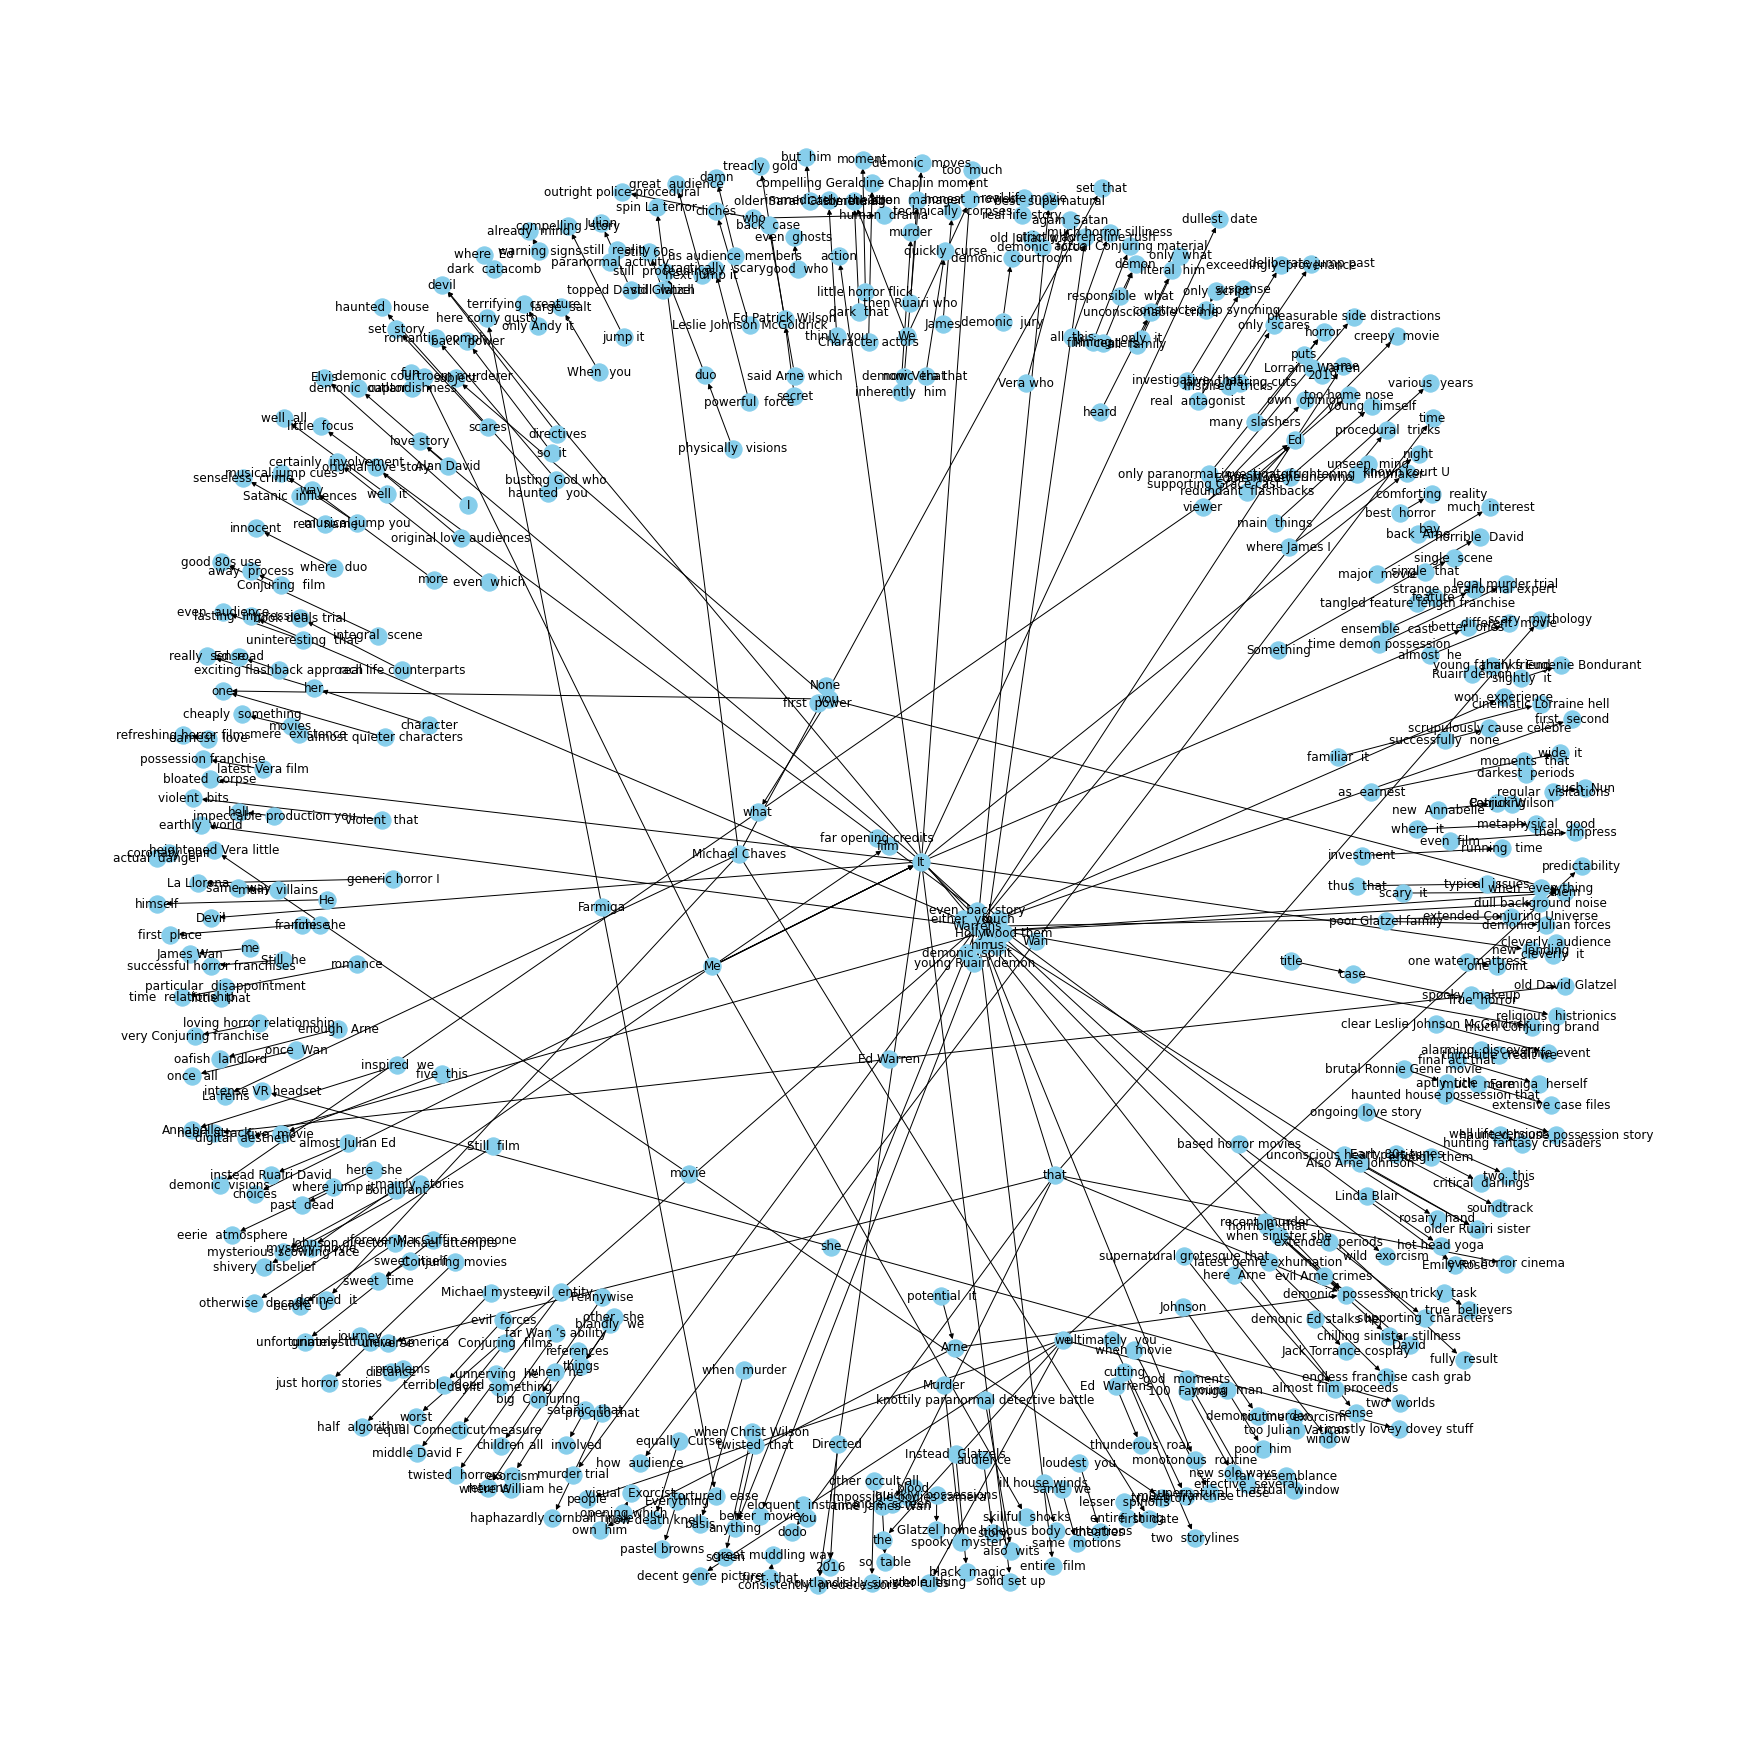

In [ ]:
plt.figure(figsize=(24,24))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### Plot Graph - Nodes and Edges

<Figure size 864x864 with 0 Axes>

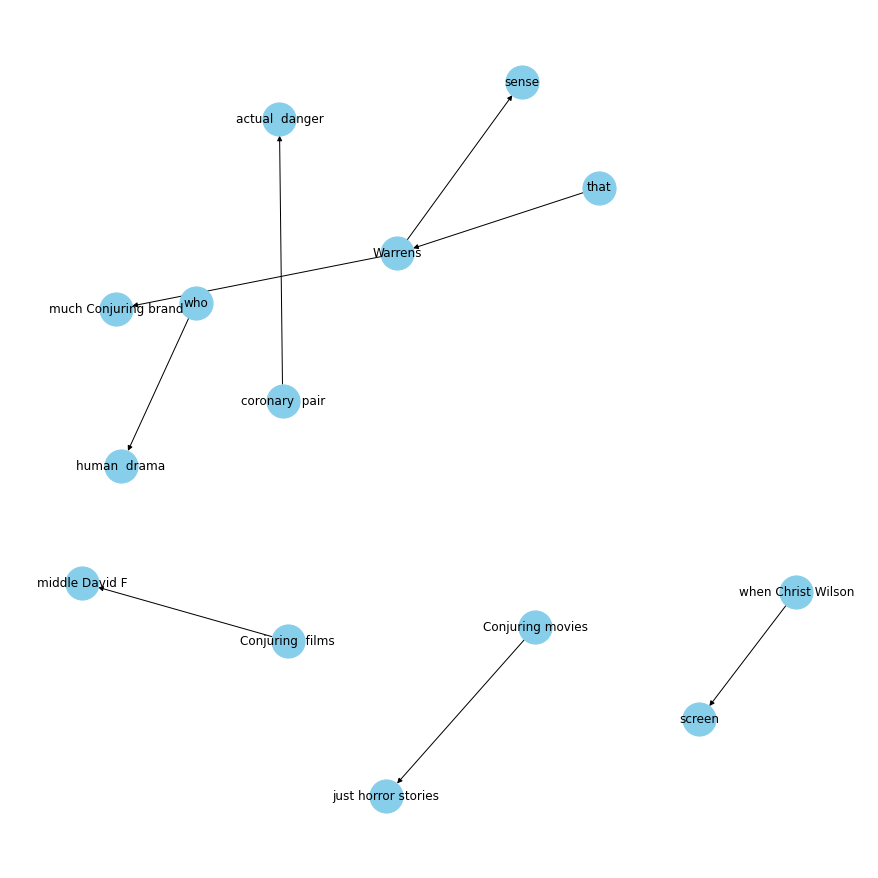

In [ ]:
G=nx.from_pandas_edgelist(kg_df_1[kg_df_1['edge']=="are"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.9) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1100, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

<Figure size 864x864 with 0 Axes>

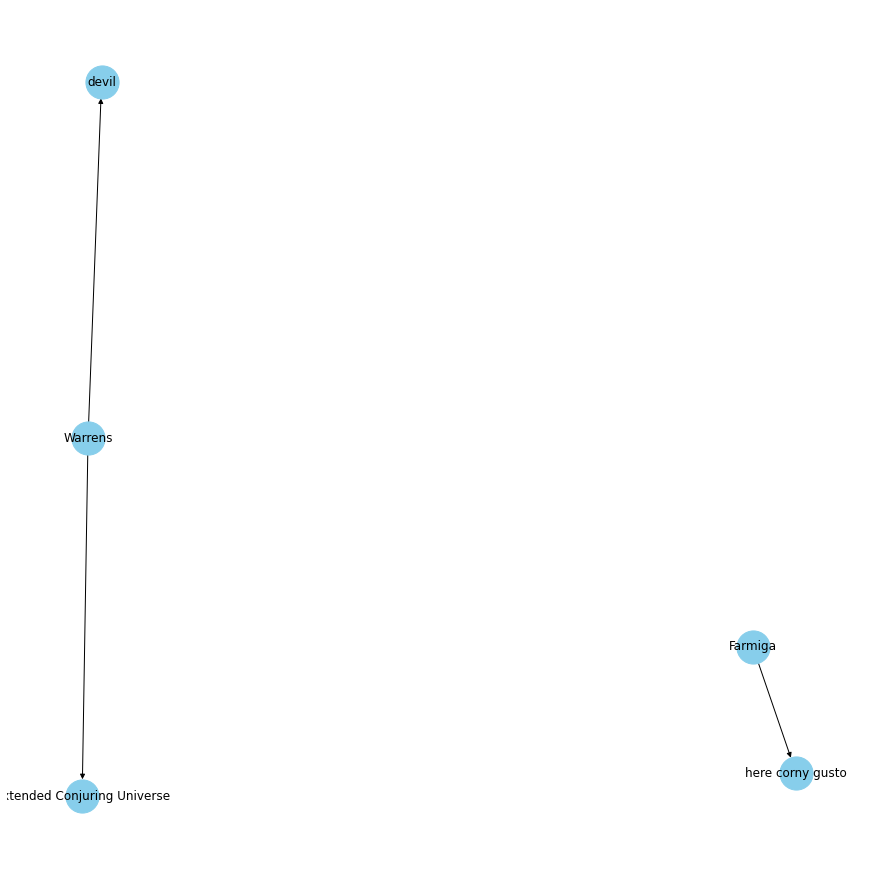

In [ ]:
G=nx.from_pandas_edgelist(kg_df_1[kg_df_1['edge']=="continue"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1100, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

<Figure size 864x864 with 0 Axes>

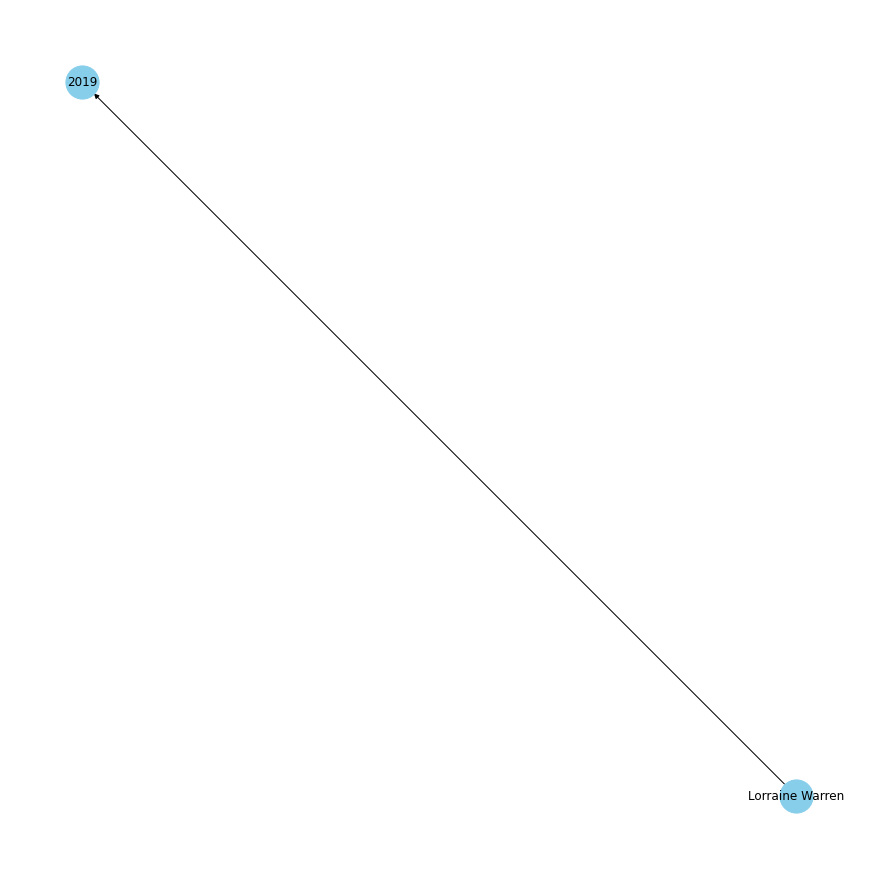

In [ ]:
G=nx.from_pandas_edgelist(kg_df_1[kg_df_1['edge']=="died in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1100, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

<Figure size 864x864 with 0 Axes>

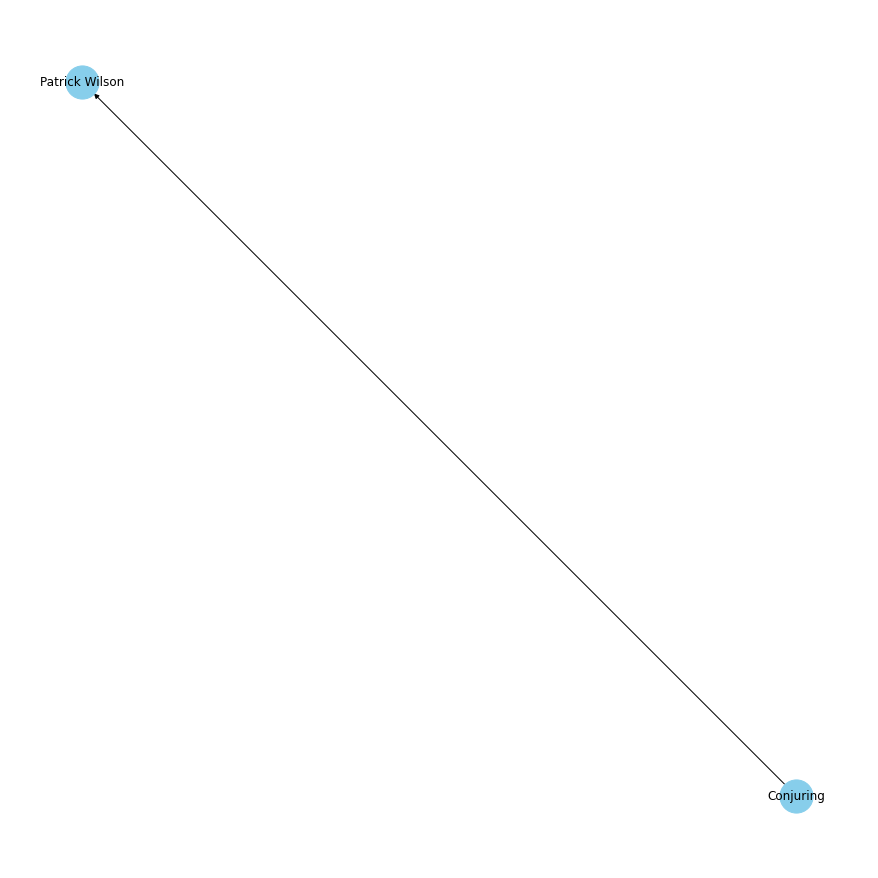

In [ ]:
G=nx.from_pandas_edgelist(kg_df_1[kg_df_1['edge']=="directed by"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1100, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

<Figure size 1152x1152 with 0 Axes>

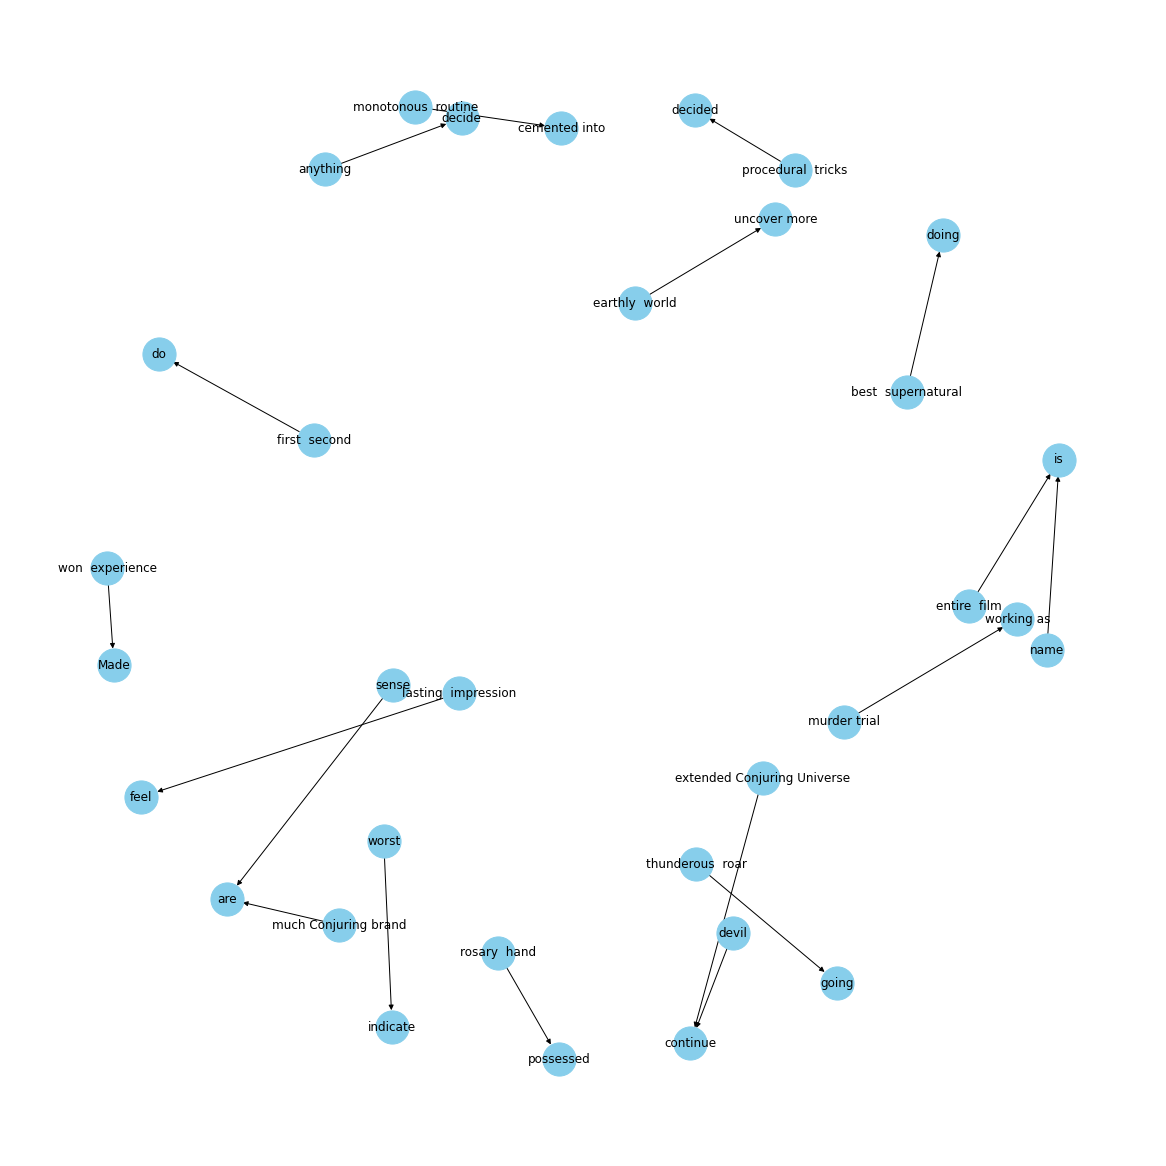

In [ ]:
G=nx.from_pandas_edgelist(kg_df_1[kg_df_1['source'].str.contains('Warrens', regex=True, na=True)], "target", "edge", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(16,16))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1100, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

# Deep Learning experiments (LSTM)

In [ ]:
# full corpus data
data.shape

(249, 9)

## Utility Functions

In [ ]:
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
def get_dataset_partitions_pd(data, train_split=0.8, val_split=0.10, test_split=0.10):
    #assert (train_split + test_split + val_split) == 1
    # Only allows for equal validation and test splits
    #assert val_split == test_split
    # Specify seed to always have the same split distribution between runs
    df_sample = data.sample(frac=1, random_state=12)
    indices_or_sections = [int(.8*len(data)), int(.9*len(data))]
    train_dataset, test_val_dataset, test_dataset = np.split(df_sample, indices_or_sections)
    return train_dataset, test_val_dataset, test_dataset

In [ ]:
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

## Sentiments classification

### Load Data and Create Blog of Text for Knowledge Graph Generation

In [ ]:
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-453/W7"

total 9082
-rw------- 1 root root 1187253 Feb 21 01:17  MSDS453_Assignment_03_v07_20211226.ipynb
-rw------- 1 root root  558356 Feb 21 00:51 'MSDS453_Assignment3_Additional_Code_Sentiment_Classification(team).ipynb'
-rw------- 1 root root 5677928 Feb 19 22:36  MSDS_453_Assignment_3_Experiments_Ref.ipynb
-rw------- 1 root root  633453 Feb 21 00:51 'MSDS453_Assignment3_Genre_Classification_Additional_Code(team).ipynb'
-rw------- 1 root root 1218791 Feb  6 03:15  MSDS453_Sec57_ClassCorpus_v4.csv
-rw------- 1 root root   10728 Feb 20 03:32  sub_obj.csv
-rw------- 1 root root     143 Feb 20 03:25  sub_obj.gsheet
-rw------- 1 root root   10774 Feb 20 03:34 'sub_obj - sub_obj.csv'


In [ ]:
path_to_file=('/content/drive/My Drive/Colab_Notebooks/MSDS-453/W7/MSDS453_Sec57_ClassCorpus_v4.csv')
data1 = pd.read_csv(path_to_file)

#adding a column to the dataframe to store the processed text
data1['processed_text'] = data1['Text'].apply(lambda x: clean_doc(x))

data1.head(2)

,Doc_ID,DSI_Title,Text,Submission File Name,Student Name,Genre of Movie,Review Type (pos or neg),Movie Title,processed_text
0,0,HAG_Doc1_Frozen2,"Parents, you can breathe a sigh of relief. Fro...",HAG_Doc1_Frozen2,HAG,Comedy,Positive,Frozen_2,"[parents, breathe, relief, frozen, showstopper..."
1,1,HAG_Doc2_Frozen2,Theyre back the first Disney princesses to pe...,HAG_Doc2_Frozen2,HAG,Comedy,Positive,Frozen_2,"[first, disney, princesses, persuade, boxoffic..."


In [ ]:
data1["label_sentiment"] = data1["Review Type (pos or neg)"].astype("category")
full_corpus = data1[['Text', 'label_sentiment']]
full_corpus.head()
full_corpus.shape

,Text,label_sentiment
0,"Parents, you can breathe a sigh of relief. Fro...",Positive
1,Theyre back the first Disney princesses to pe...,Positive
2,Released in 2013 to a record-scorching $1.29 b...,Positive
3,"After the colossal success of Frozen, Disneys ...",Positive
4,Animated adventure featuring the voices of Idi...,Positive


(249, 2)

In [ ]:
full_corpus['text_length'] = full_corpus['Text'].map(len)
full_corpus.head(10)

,Text,label_sentiment,text_length
0,"Parents, you can breathe a sigh of relief. Fro...",Positive,3330
1,Theyre back the first Disney princesses to pe...,Positive,4063
2,Released in 2013 to a record-scorching $1.29 b...,Positive,9106
3,"After the colossal success of Frozen, Disneys ...",Positive,4805
4,Animated adventure featuring the voices of Idi...,Positive,3193
5,Three weeks after Donald Trump was elected pre...,Negative,6325
6,We have seen it thousands of times in our live...,Negative,4428
7,Two thoughts occurred while watching the seque...,Negative,4374
8,"Once upon a time, Disney sent its subpar seque...",Negative,4470
9,"Elsa does not get a girlfriend in Frozen II, w...",Negative,5196


In [ ]:
full_corpus.groupby(['label_sentiment']).agg({ 'text_length' : ['min', 'max','mean']})

text_length                    
                        min    max         mean
label_sentiment                                
Negative                739  12949  4784.792000
Positive                522   9894  4732.653226

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

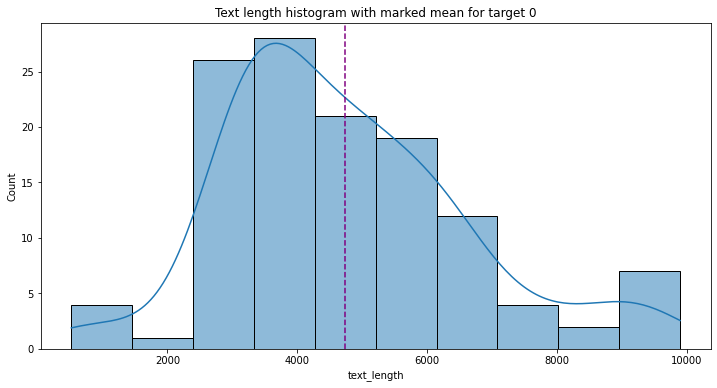

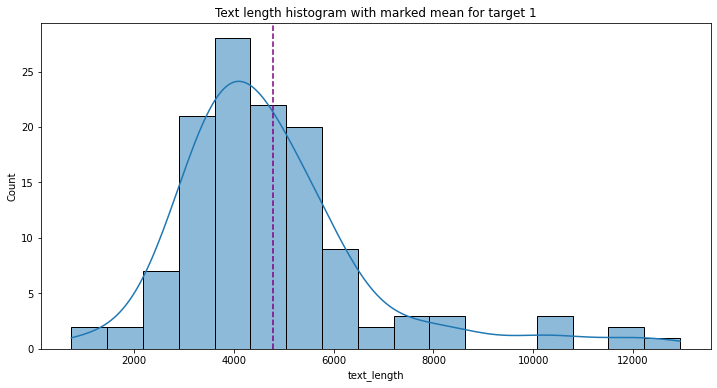

In [ ]:
# Histogram of text length for Positive reviews
plt.figure(figsize=(12,6))

g = sns.histplot(data = full_corpus[full_corpus['label_sentiment'] == 'Positive'], 
                 x = 'text_length', kde = True).set_title("Text length histogram with marked mean for target 0")

g = plt.axvline(full_corpus[full_corpus['label_sentiment'] == 'Positive'].text_length.mean(), 
                color='purple', linestyle = '--')

# Histogram of text length for negative reviews
plt.figure(figsize=(12,6))

g = sns.histplot(data = full_corpus[full_corpus['label_sentiment'] == 'Negative'], 
                 x = 'text_length', kde = True).set_title("Text length histogram with marked mean for target 1")

g = plt.axvline(full_corpus[full_corpus['label_sentiment'] == 'Negative'].text_length.mean(), 
                color='purple', linestyle = '--')

In [ ]:
train_dataset0, test_dataset0 = train_test_split(full_corpus, test_size=0.3, stratify=full_corpus["label_sentiment"])


In [ ]:
from sklearn.model_selection import train_test_split
#split the data

train_dataset, test_dataset = train_test_split(full_corpus, test_size=0.3, stratify=full_corpus["label_sentiment"])
#test_dataset, val_dataset = train_test_split(test_val_dataset, test_size=0.5, stratify=test_val_dataset["label_sentiment"])

train_dataset.shape
#val_dataset.shape
test_dataset.shape

(174, 3)

(75, 3)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_dataset["Text"].tolist(), train_dataset["label_sentiment"].cat.codes)
)

test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_dataset["Text"].tolist(), test_dataset["label_sentiment"].cat.codes)
)

In [ ]:
batch_size = 3
AUTOTUNE = tf.data.experimental.AUTOTUNE
buffer_size=train_dataset.cardinality().numpy()

train_dataset = train_dataset.shuffle(buffer_size=buffer_size)\
                   .batch(batch_size=batch_size,drop_remainder=True)\
                   .cache()\
                   .prefetch(AUTOTUNE)

test_dataset = test_dataset.shuffle(buffer_size=buffer_size)\
                   .batch(batch_size=batch_size,drop_remainder=True)\
                   .cache()\
                   .prefetch(AUTOTUNE)

In [ ]:
train_dataset.as_numpy_iterator()

In [ ]:
full_corpus["label_sentiment"].value_counts()

Negative    125
Positive    124
Name: label_sentiment, dtype: int64

### Preprocessing the Data

In [ ]:
type(train_dataset), type(test_dataset) 


(tensorflow.python.data.ops.dataset_ops.PrefetchDataset,
 tensorflow.python.data.ops.dataset_ops.PrefetchDataset)

In [ ]:
len(train_dataset), len(test_dataset) 
# len(train_dataset),len(test_dataset) 

(58, 25)

### Preprocessing Shuffle Data for Training and Create Batches of `(text, label)` pairs:

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

### Text Vectorization

In [ ]:
VOCAB_SIZE=2100
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
len(vocab)

2100

In [ ]:
vocab = np.array(encoder.get_vocabulary())
# Top 50 frequent words
vocab[:50]

array(['', '[UNK]', 'the', 'a', 'and', 'of', 'to', 'in', 'is', 'that',
       'it', 'as', 'with', 'for', 'but', 'his', 'on', 'this', 'by', 'are',
       'an', 'film', 'he', 'its', 'be', 'from', 'her', 'has', 'at', 'one',
       'not', 'i', 'have', 'all', 'who', 'movie', 'more', 'you', 'their',
       'so', 'like', 'was', 'or', 'about', 'they', 'out', 'into', 'which',
       'it’s', 'when'], dtype='<U14')

Here are the 20 least frequent words.

In [ ]:
vocab[-50:]

array(['balance', 'badly', 'backstory', 'awe', 'aspects', 'asked',
       'arrive', 'arent', 'apatow’s', 'anymore', 'anxiety', 'andie',
       'actions', 'above', '2001', '“i’m', 'year’s', 'x', 'writer',
       'wrapped', 'wouldn’t', 'worthy', 'worry', 'won', 'woke', 'witty',
       'winter', 'winds', 'wilsons', 'whenever', 'weeks', 'wearing',
       'weapon', 'waste', 'warren', 'wanting', 'walls', 'walking',
       'visionary', 'vigilante', 'venice', 'vehicle', 'variety', 'values',
       'unlikely', 'universal', 'uncomfortable', 'ultimate', 'types',
       'tunes'], dtype='<U14')

### LSTM Model

In [ ]:
num_classes = 2
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=32,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])



In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True, True]


In [ ]:
start=datetime.now()

history = model.fit(train_dataset, epochs=13,
                    validation_data=test_dataset
                    )

end=datetime.now()
print("Sentiment analysis total time:", end-start) 

Epoch 1/13
58/58 [==============================] - 113s 2s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5067
Epoch 2/13
58/58 [==============================] - 94s 2s/step - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5067
Epoch 3/13
58/58 [==============================] - 94s 2s/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5067
Epoch 4/13
58/58 [==============================] - 96s 2s/step - loss: 0.6879 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5067
Epoch 5/13
58/58 [==============================] - 93s 2s/step - loss: 0.6808 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5067
Epoch 6/13
58/58 [==============================] - 93s 2s/step - loss: 0.6560 - accuracy: 0.5000 - val_loss: 0.6807 - val_accuracy: 0.5067
Epoch 7/13
58/58 [==============================] - 93s 2s/step - loss: 0.6461 - accuracy: 0.5000 - val_loss: 0.6780 - val_accuracy: 0.5067
Epoch 8/13
58/58 [=

In [ ]:
train_loss, train_acc = model.evaluate(train_dataset)

print('Train Loss: {}'.format(train_loss))
print('Train Accuracy: {}'.format(train_acc))

58/58 [==============================] - 11s 194ms/step - loss: 0.0495 - accuracy: 1.0000
Train Loss: 0.04950378090143204
Train Accuracy: 1.0


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

25/25 [==============================] - 5s 211ms/step - loss: 0.9678 - accuracy: 0.5200
Test Loss: 0.9677944183349609
Test Accuracy: 0.5199999809265137


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 32)          67200     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              164864    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 3

### Plotting Performance Metrics

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail(10).round(3)

,loss,accuracy,val_loss,val_accuracy
3,0.688,0.500,0.692,0.507
4,0.681,0.500,0.691,0.507
5,0.656,0.500,0.681,0.507
6,0.646,0.500,0.678,0.507
7,0.489,0.707,0.682,0.480
8,0.408,0.879,0.679,0.533
9,0.318,0.908,0.678,0.560
10,0.203,0.966,0.794,0.547
11,0.112,0.994,0.960,0.520
12,0.062,0.994,0.968,0.520


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

<Figure size 1152x288 with 0 Axes>

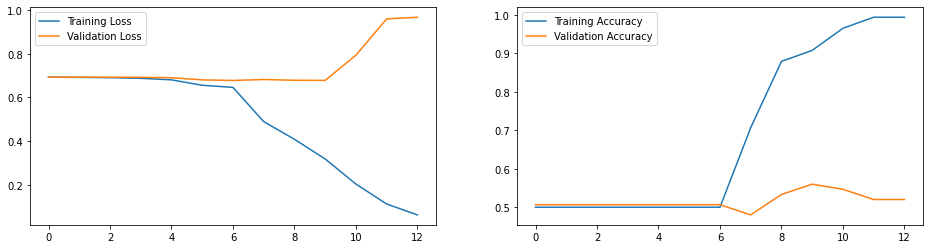

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 32)          67200     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              164864    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 3

# Genre Classification

In [ ]:
data1['Genre of Movie'] = data1['Genre of Movie'].astype("category")
full_corpus1 = data1[['Text', 'Genre of Movie']]
full_corpus1.head()
full_corpus1.shape

,Text,Genre of Movie
0,"Parents, you can breathe a sigh of relief. Fro...",Comedy
1,Theyre back the first Disney princesses to pe...,Comedy
2,Released in 2013 to a record-scorching $1.29 b...,Comedy
3,"After the colossal success of Frozen, Disneys ...",Comedy
4,Animated adventure featuring the voices of Idi...,Comedy


(249, 2)

In [ ]:
from sklearn.model_selection import train_test_split
#split the data

train_dataset1, test_dataset1 = train_test_split(full_corpus1, test_size=0.3, stratify=full_corpus1['Genre of Movie'])

train_dataset1.shape
test_dataset1.shape

(174, 2)

(75, 2)

In [ ]:
train_dataset1 = tf.data.Dataset.from_tensor_slices(
    (train_dataset1["Text"].tolist(), train_dataset1['Genre of Movie'].cat.codes)
)

test_dataset1 = tf.data.Dataset.from_tensor_slices(
    (test_dataset1["Text"].tolist(), test_dataset1['Genre of Movie'].cat.codes)
)

In [ ]:
batch_size = 3
AUTOTUNE = tf.data.experimental.AUTOTUNE
buffer_size=train_dataset1.cardinality().numpy()

train_dataset1 = train_dataset1.shuffle(buffer_size=buffer_size)\
                   .batch(batch_size=batch_size,drop_remainder=True)\
                   .cache()\
                   .prefetch(AUTOTUNE)

test_dataset1 = test_dataset1.shuffle(buffer_size=buffer_size)\
                   .batch(batch_size=batch_size,drop_remainder=True)\
                   .cache()\
                   .prefetch(AUTOTUNE)

In [ ]:
train_dataset1.as_numpy_iterator()

In [ ]:
full_corpus1['Genre of Movie'].value_counts()

Action    70
Comedy    60
Horror    60
Sci_Fi    50
Drama      9
Name: Genre of Movie, dtype: int64

### Preprocessing the Data

In [ ]:
type(train_dataset1), type(test_dataset1) 


(tensorflow.python.data.ops.dataset_ops.PrefetchDataset,
 tensorflow.python.data.ops.dataset_ops.PrefetchDataset)

In [ ]:
len(train_dataset1), len(test_dataset1) 
# len(train_dataset1),len(test_dataset1) 

(58, 25)

### Preprocessing Shuffle Data for Training and Create Batches of `(text, label)` pairs:

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

### Text Vectorization

In [ ]:
VOCAB_SIZE=2100
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset1.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
len(vocab)

2100

In [ ]:
vocab = np.array(encoder.get_vocabulary())
# Top 50 frequent words
vocab[:50]

array(['', '[UNK]', 'the', 'a', 'and', 'of', 'to', 'in', 'is', 'that',
       'it', 'with', 'as', 'for', 'but', 'on', 'this', 'his', 'by', 'an',
       'he', 'its', 'are', 'be', 'film', 'her', 'movie', 'has', 'from',
       'at', 'one', 'i', 'you', 'who', 'not', 'all', 'have', 'or', 'more',
       'like', 'was', 'so', 'they', 'their', 'into', 'about', 'when',
       'out', 'which', 'it’s'], dtype='<U15')

Here are the 20 least frequent words.

In [ ]:
vocab[-50:]

array(['develop', 'despair', 'described', 'delivered', 'dedicated',
       'decided', 'dealer', 'daniel', 'damn', 'cox', 'corpses', 'corn',
       'convoluted', 'conversations', 'conventional', 'context',
       'content', 'contains', 'commercial', 'comforting', 'comedies',
       'combat', 'colors', 'claire', 'choose', 'cheap', 'character’s',
       'center', 'casting', 'carry', 'capable', 'cameo', 'calling',
       'caine', 'burn', 'builds', 'buck', 'bryce', 'bright', 'boys',
       'boss', 'blue', 'believes', 'bed', 'beauty', 'beats', 'beach',
       'badly', 'background', 'avoid'], dtype='<U15')

### LSTM Model

In [ ]:
num_classes = 5
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True, True]


In [ ]:
start=datetime.now()

history = model.fit(train_dataset1, epochs=15,
                    validation_data=test_dataset1
                    )

end=datetime.now()
print("Sentiment analysis total time:", end-start) 

Epoch 1/15
58/58 [==============================] - 120s 2s/step - loss: 0.5831 - accuracy: 0.2816 - val_loss: 0.3265 - val_accuracy: 0.2800
Epoch 2/15
58/58 [==============================] - 106s 2s/step - loss: -7.7888 - accuracy: 0.2471 - val_loss: -17.9080 - val_accuracy: 0.2400
Epoch 3/15
58/58 [==============================] - 106s 2s/step - loss: -30.2530 - accuracy: 0.2414 - val_loss: -43.5816 - val_accuracy: 0.2400
Epoch 4/15
58/58 [==============================] - 106s 2s/step - loss: -60.2537 - accuracy: 0.2414 - val_loss: -77.1733 - val_accuracy: 0.2400
Epoch 5/15
58/58 [==============================] - 105s 2s/step - loss: -97.2967 - accuracy: 0.2414 - val_loss: -117.5043 - val_accuracy: 0.2400
Epoch 6/15
58/58 [==============================] - 105s 2s/step - loss: -141.4337 - accuracy: 0.2414 - val_loss: -165.4078 - val_accuracy: 0.2400
Epoch 7/15
58/58 [==============================] - 106s 2s/step - loss: -193.5999 - accuracy: 0.2414 - val_loss: -221.7657 - val_ac

In [ ]:
train_loss, train_acc = model.evaluate(train_dataset1)

print('Train Loss: {}'.format(train_loss))
print('Train Accuracy: {}'.format(train_acc))

58/58 [==============================] - 13s 225ms/step - loss: -1088.6201 - accuracy: 0.2414
Train Loss: -1088.6201171875
Train Accuracy: 0.24137930572032928


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset1)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

25/25 [==============================] - 5s 204ms/step - loss: -1089.8086 - accuracy: 0.2400
Test Loss: -1089.80859375
Test Accuracy: 0.23999999463558197


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          134400    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              197632    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                

### Plotting Performance Metrics

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail(10).round(3)

,loss,accuracy,val_loss,val_accuracy
5,-141.434,0.241,-165.408,0.24
6,-193.600,0.241,-221.766,0.24
7,-254.619,0.241,-287.351,0.24
8,-325.683,0.241,-364.657,0.24
9,-409.704,0.241,-454.329,0.24
10,-505.187,0.241,-555.553,0.24
11,-612.636,0.241,-669.112,0.24
12,-732.740,0.241,-795.637,0.24
13,-866.092,0.241,-935.694,0.24
14,-1013.237,0.241,-1089.809,0.24


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

<Figure size 1152x288 with 0 Axes>

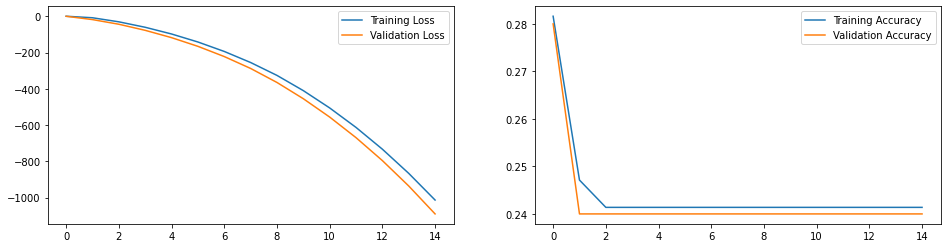

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model Summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          134400    
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              197632    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                